In [1]:
#!pip install fuzzywuzzy
#!pip install fuzzywuzzy[speedup]
#!pip install pandas
#!pip install seaborn
#!pip install matploitlib
#!pip install scipy
#!pip install xgboost

In [2]:
#Importing all required libraries
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from fuzzywuzzy import process # Updated package name for fuzzy matching

In [3]:
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning) 

##### Dataset Setup and Feature Matching
##### Function to load, clean, and process data  


In [4]:
# Define dataset directory

data_dir = r"C:\Users\Celine\Documents\Hirwa documents\Document stuff\ACEDS\DHS Surveys data\Maternalhealthdata"

# Define file names for different years
files = {
    #2005:"2005C.csv",
    2010: "2010C.csv",
    2015: "2015C.csv",
    2020: "2020C.csv"
}
# Define the list of features we need
columns_to_check = [
    "women's age in years", 
    'Region',
    'religion',
    'Highest educational level',
    "Husband/partner’s education level",
    "Husband/partner’s occupation", 
    "Respondent’s occupation", 
    "Wealth index", "wealth index combined",
    "Source of drinking water",
    "Number of household members",
    "Frequency of reading newspaper or magazine",
    "Frequency of watching television",
    "Frequency of listening to radio",
    "in the last 12 months, have you used internet?",
    "Frequency of using internet",
    "type of toilet facility",
    "toilet facilities shared with other households",
    "Marital status",
    "currently pregnant",
    "Number of antenatal care",
    "Duration of current pregnancy", 
    "History of the place of delivery", 
    "Birth history",
    "knowledge of any method", 
    "current contraceptive method",
    "Iron tablet during pregnancy", 
    "Currently breastfeeding", 
    "Body mass index (BMI)",
    "respondent's weight in kilograms (1 decimal)",
    "respondent's height in centimeters (1 decimal)", 
    "Had malaria recently",
    "Had diarrhea recently", 
    "have mosquito bed net for sleeping" ,
    "Nutritional status and dietary intake",
    "hemoglobin level (g/dl - 1 decimal)",
    "Chronic infections and inflammation", 
    "Menstrual history",
    "duration of breastfeeding", 
    "respondent's year of birth",
    "respondent's current age",
    "Smokes Cigarettes",
    "Type of place of residence",
    "How many miscarriages, abortions, and stillbirths have you had",
    "“How many weeks or months pregnant are you?",
    "Currently using contraception",
    "Type of contraceptive method used",
    "Duration of method use",
    "Number of contraceptive methods known",
    "province",
    "anemia level",

    'pregnancy outcome',  # Q402/Q405
    'number of pregnancy losses',  # Derived from Q402 (types 3, 4, 5)
    'weeks or months pregnant',  # Q416
    'trimester of first ANC',  # Also Q416, needs transformation
    'received blood test during ANC',  # Q418c
    'Talk with you about which foods or how much food you should eat?',  # Q418e
    "preceding birth interval (months)"


    'received iron supplements',  # Q426
    'tetanus injection before or during_pregnancy',  # Q420–Q425
    'pregnancy wanted or not',  # Q408/Q409
    'vaginal bleeding during pregnancy',  # Q418g
    'ANC provider type',  # Q414
    'ANC facility type', # Q415
    'source of iron tablets or syrup',
    'number of days iron tablets or syrup taken',
    'took deworming medication during pregnancy',
    'received food or cash assistance for pregnancy',
    'took SP Fansidar for malaria prevention',
    'number of SP Fansidar doses taken',
    'source of SP Fansidar',
    'place of delivery',
    'caesarean section',
    'put on mothers chest after birth',
    'how long after birth put on chest',
    'how long kept in skin to skin contact',
    'Do you currently smoke or use any other type of tobacco every day, some days, or not at all?',
    'Are you or your partner currently doing something or using any method to delay or avoid getting pregnant?',
    'which method are you using',
    'How many times did you receive antenatal care during this pregnancy?'	
    "Attended school?",
    "Days took iron tablets/syrup",
    "Source of iron tablets/syrup",
    "number of times micronutrient was given",
    "Took medicine for worms?",
    "Received food or cash aid?",
    "Took SP/Fansidar for malaria?",
    "Times took SP/Fansidar",
    "Highest education level"

]

from fuzzywuzzy import process

def match_columns(df, columns_to_check, threshold=80, review_threshold=85):
    matched_columns = {}
    borderline_matches = []

    for col in columns_to_check:
        best_match, score = process.extractOne(col, df.columns)
        if score >= threshold:
            matched_columns[col] = best_match
            if score < review_threshold:
                # Collect borderline matches for manual review
                borderline_matches.append((col, best_match, score))
        else:
            matched_columns[col] = None

    selected_columns = [matched_columns[col] for col in matched_columns if matched_columns[col] is not None]
    missing_columns = [col for col in matched_columns if matched_columns[col] is None]

    print(f"\n✔️ Matched Columns ({len(selected_columns)}): {selected_columns}")
    print(f"❌ Missing Columns ({len(missing_columns)}): {missing_columns}")

    if borderline_matches:
        print("\n⚠️ Borderline matches (consider reviewing these):")
        for original, matched, score in borderline_matches:
            print(f"  '{original}' matched to '{matched}' with score {score}")

    return selected_columns





In [5]:
# Function to load, clean, and process data
def load_and_clean_data(year, file_name):
    file_path = os.path.join(data_dir, file_name)
    
    # Load data
    df = pd.read_csv(file_path)

    # Drop columns with all missing values
    df = df.dropna(axis=1, how='all')

    # Match dataset columns with selected features
    selected_columns = match_columns(df, columns_to_check)
    
    # Keep only required columns
    df = df[selected_columns]

    # Add a Year column
    df['Year'] = year

    return df

In [6]:
# Process all datasets and merge
df_list = [load_and_clean_data(year, files[year]) for year in files]

C:\Users\CHirwa\AppData\Local\Temp\ipykernel_12008\213273822.py:6: DtypeWarning: Columns (45,47,73,141,142,143,144,145,146,147,221,222,223,224,225,226,227,241,242,243,244,245,246,247,253,254,255,256,257,258,259,260,261,262,265,319,320,321,322,323,324,325,326,341,342,343,344,345,346,347,395,396,398,399,400,401,402,403,404,405,406,407,420,421,422,423,424,425,426,433,434,437,438,439,440,441,442,443,444,445,446,473,481,483,491,493,567,586,587,588,589,590,591,595,647,692,808,809,814,815,820,821,844,845,850,851,856,857,862,863,868,869,886,887,892,893,898,899,903,904,905,908,909,910,915,916,920,921,922,928,929,932,933,934,938,944,952,953,958,959,964,965,969,970,971,976,977,988,989,994,995,1018,1019,1082,1166,1532,1538,1544,1604,1605,1606,1607,1608,1609,1610,1611,1612,1618,1654,1655,1703,1727,1728,1733,1734,1737,1738,1743,1745,1757,1758,1781,1782,1805,1806,1829,1830,1853,1854,1877,1878,1901,1902,1905,1925,1926,1935,1937,1948,1949,1950,1955,1956,1960,1961,1966,1967,1968,1972,1973,1974,1978,1979


✔️ Matched Columns (86): ["women's age in years (from household questionnaire)", 'region', 'religion', 'highest educational level', "husband/partner's education level", "husband/partner's occupation", "respondent's occupation", 'wealth index', 'wealth index', 'source of drinking water', 'number of household members (listed)', 'frequency of reading newspaper or magazine', 'frequency of watching television', 'frequency of listening to radio', 'age in 5-year groups', 'month of interview', 'type of toilet facility', 'toilet facilities shared with other households', 'current marital status', 'currently pregnant', 'cluster number', 'duration of current pregnancy', 'place of delivery', 'entries in birth history', 'knowledge of any method', 'current contraceptive method', 'living children + current pregnancy (grouped)', 'currently breastfeeding', 'body mass index', "respondent's weight in kilograms (1 decimal)", "respondent's height in centimeters (1 decimal)", 'ever had a terminated pregnanc

C:\Users\CHirwa\AppData\Local\Temp\ipykernel_12008\213273822.py:6: DtypeWarning: Columns (45,47,73,141,142,143,144,145,146,221,222,223,224,225,226,241,242,243,244,245,246,253,254,255,256,257,258,259,260,261,262,263,319,320,321,322,323,324,325,341,342,343,344,345,346,393,394,395,396,397,398,399,400,401,402,403,404,405,406,420,421,422,423,424,425,433,434,435,436,437,438,439,440,441,442,443,444,445,473,481,483,491,493,567,586,587,588,589,591,595,647,808,809,814,815,820,821,844,845,850,851,856,857,862,863,868,869,880,881,886,887,892,893,898,899,903,904,905,908,909,910,915,920,921,928,929,932,933,934,938,944,952,953,958,959,964,965,968,969,970,971,976,977,988,989,994,995,1018,1019,1023,1082,1532,1602,1603,1604,1605,1606,1607,1608,1609,1610,1616,1618,1654,1655,1704,1728,1729,1734,1735,1738,1739,1758,1759,1782,1783,1806,1807,1830,1831,1854,1855,1878,1879,1902,1903,1926,1927,1930,1931,1948,1949,1950,1951,1956,1957,1960,1961,1962,1966,1967,1968,1972,1973,1974,1978,1979,1980,1984,1985,1986,1990,


✔️ Matched Columns (87): ["women's age in years (from household questionnaire)", 'de jure region of residence', 'religion', 'highest educational level', "husband/partner's education level", "husband/partner's occupation", "respondent's occupation", 'wealth index', 'wealth index', 'source of drinking water', 'number of household members (listed)', 'frequency of reading newspaper or magazine', 'frequency of watching television', 'frequency of listening to radio', 'age in 5-year groups', 'month of interview', 'type of toilet facility', 'toilet facilities shared with other households', 'current marital status', 'currently pregnant', 'cluster number', 'duration of current pregnancy', 'place of delivery', 'entries in birth history', 'knowledge of any method', 'current contraceptive method', 'living children + current pregnancy (grouped)', 'currently breastfeeding', 'body mass index', "respondent's weight in kilograms (1 decimal)", "respondent's height in centimeters (1 decimal)", 'selected 

C:\Users\CHirwa\AppData\Local\Temp\ipykernel_12008\213273822.py:6: DtypeWarning: Columns (51,53,93,153,154,155,156,157,233,234,235,236,237,253,254,255,256,257,266,267,268,269,270,271,272,273,274,275,276,332,333,334,335,336,337,353,354,355,356,357,406,407,408,409,410,411,412,413,414,415,416,417,432,433,434,435,436,446,448,452,453,454,455,456,457,584,586,661,668,680,681,682,683,684,685,904,905,906,910,911,912,916,917,918,940,941,942,946,947,948,952,953,954,958,959,960,964,965,966,982,983,984,988,989,990,994,995,996,999,1000,1001,1002,1004,1005,1006,1011,1012,1016,1017,1018,1024,1025,1026,1028,1029,1030,1034,1040,1048,1049,1050,1054,1055,1056,1059,1060,1066,1067,1068,1070,1071,1072,1078,1079,1080,1090,1091,1092,1096,1097,1098,1120,1121,1125,1184,1274,1280,1286,1292,1298,1304,1310,1316,1322,1328,1364,1370,1628,1634,1640,1652,1690,1691,1692,1807,1808,1809,1810,1811,1812,1813,1814,1815,1821,1823,1866,1867,1915,1938,1939,1940,1944,1945,1946,1950,1951,1952,1961,1974,1975,1976,1998,1999,2000,20


✔️ Matched Columns (86): ["women's age in years (from household questionnaire)", 'region', 'religion', 'highest educational level', "husband/partner's education level", "husband/partner's occupation", "respondent's occupation", 'all woman factor - wealth index', 'wealth index combined', 'source of drinking water', 'number of household members (listed)', 'frequency of reading newspaper or magazine', 'frequency of watching television', 'frequency of listening to radio', 'age in 5-year groups', 'frequency of using internet last month', 'type of toilet facility', 'toilet facilities shared with other households', 'current marital status', 'currently pregnant', 'cluster number', 'duration of current pregnancy', 'place of delivery', 'entries in birth history', 'knowledge of any method', 'current contraceptive method', 'living children + current pregnancy (grouped)', 'currently breastfeeding', 'body mass index', "respondent's weight in kilograms (1 decimal)", "respondent's height in centimete

In [7]:
for i, df in enumerate(df_list):
    if df.columns.duplicated().any():
        print(f"Duplicate columns found in df_list[{i}]: {df.columns[df.columns.duplicated()].tolist()}")
        # Optionally, you can rename the columns here if needed

Duplicate columns found in df_list[0]: ['wealth index', 'country code and phase', 'country code and phase', 'currently pregnant', 'month of interview', 'number of household members (listed)', 'cluster number', 'duration of current pregnancy', 'cluster number', 'frequency of reading newspaper or magazine', 'number of household members (listed)', 'usual resident or visitor', 'usual resident or visitor', 'frequency of reading newspaper or magazine', 'type of place of residence', 'type of place of residence', 'month of interview', 'cluster number', 'usual resident or visitor', 'cluster number', 'place of delivery', 'date of birth (cmc)', 'age in 5-year groups', 'month of interview', 'time to get to water source - minutes', 'duration of current pregnancy', 'during pregnancy, given or bought iron tablets/syrup', 'month of interview', 'cluster number', 'frequency of reading newspaper or magazine', 'highest educational level']
Duplicate columns found in df_list[1]: ['wealth index', 'country co

In [8]:
# Remove duplicate columns in each DataFrame
df_list = [
    df.loc[:, ~df.columns.duplicated()] for df in df_list
]

In [9]:
# Create a dictionary to map the current column names in df_list[0] to the desired column names
rename_dict = {
    "women's age in years from household report": "women's age in years (from household questionnaire)",
    "partner's education level": "husband/partner's education level",
    "partner's occupation": "husband/partner's occupation", 
    'wealth index combined': 'wealth index',
    'number of household members': 'number of household members (listed)',
    'frequency of reading newpaper or magazine': 'frequency of reading newspaper or magazine', 
    'toilet facilities shared': 'toilet facilities shared with other households',
    'body mass index for respondent': 'body mass index',
    'weight in kilograms (1 dec.)': "respondent's weight in kilograms (1 decimal)",
    'height in centimeters (1 dec.)': "respondent's height in centimeters (1 decimal)",
    'time since last menstrual perd': 'time since last menstrual period', 
    'current age - respondent': "respondent's current age",

}

# Rename columns in df_list[0] using the dictionary
df_list[0].rename(columns=rename_dict, inplace=True)


In [10]:
# Rename the column in df_list[3]
df_list[2]=df_list[2].rename(columns={'de jure region of residence': "region"})

In [11]:
df_list[1] = df_list[1].rename(columns={"de jure region of residence": "region"})


In [12]:
df_list[2]=df_list[2].rename(columns={'wealth index combined': 'wealth index'})

In [13]:
df_list[i] = df_list[i].loc[:, ~df_list[i].columns.duplicated()]


In [14]:
#df_clean= pd.concat(df_list[1:], ignore_index=True)

In [15]:
df_list[0]["anemia level"].value_counts()

anemia level
not anemic    5775
mild           960
moderate       198
9               33
severe          16
Name: count, dtype: int64

In [16]:
df_list[1]["anemia level"].value_counts()

anemia level
not anemic    5411
mild          1041
moderate       227
severe          13
Name: count, dtype: int64

In [17]:
df_list[2]["anemia level"].value_counts()

anemia level
not anemic    6348
mild           627
moderate       302
severe          22
Name: count, dtype: int64

In [18]:

# List of columns to drop
columns_to_drop = [
    "date of interview century day code (cdc)",
    'selected for domestic violence module',
    'away for more than one month in last 12 months',
    "date of birth (cmc)",
    'time to get to water source',
    'number of times breastfed d-na.10',
    'flag for age at death',
    'current pregnancy wanted',
    'during pregnancy, had difficulty with daylight vision',
    'month of start of use of method',
    'sample weight',
    'cluster number',
    'age in 5 year groups',
    'age in 5-year groups',
    'month of interview',
    'usual resident or visitor',
    'type of mosquito bed net(s) slept under last night',
    'use mobile telephone for financial transactions',
    'type of mosquito bed net(s) slept under last night',
    'stratification used in sample design',
    'all woman factor - wealth index',
    'use mobile telephone for financial transactions',
    'duration of current pregnancy', 
    'country code and phase',
    'time to get to water source - minutes',
    'province',
    'all woman factor - wealth index',
    "respondent's height in centimeters (1 decimal)",
    "respondent's weight in kilograms (1 decimal)",
    "respondent's year of birth",
    "number of times ate solid, semi-solid or soft food yesterday",
    "years ago received last tetanus injection before pregnancy",
    "women's age in years (from household questionnaire)",
    "selected for anthropometry, anemia, malaria",
    'years ago received last tetanus injection',
    'month pregnancy ended',
    "number of household members (listed)",
    'frequency of reading newspaper or magazine',
    'frequency of watching television', 'frequency of listening to radio',
    'during pregnancy, given or bought iron tablets/syrup',
    'type of method',
    'entries in birth history',
    'toilet facilities shared with other households',
    'frequency of using internet last month',
    'number of times micronutrient was given',
    'frequency of reading newspaper or magazine',
    'frequency of watching television', 
    'frequency of listening to radio',
    'frequency of using internet last month',
    "'number of times micronutrient was given']",
    'number of household members (listed)',
    'month pregnancy ended',
    'duration of pregnancy',
    "time since last menstrual period"

]

def drop_multiple_columns(df_list, columns_to_drop):
    
    new_df_list = []
    for i, df in enumerate(df_list):
        # Only drop columns that exist in the current DataFrame
        cols_in_df = [col for col in columns_to_drop if col in df.columns]
        df_dropped = df.drop(columns=cols_in_df)
        print(f"Dropped {len(cols_in_df)} columns from df_list[{i}].")
        new_df_list.append(df_dropped)
    return new_df_list

# Example usage:
# Assuming you already have df_list = [df1, df2, df3]
# df_list = drop_multiple_columns(df_list, columns_to_drop)


In [19]:
df_list = drop_multiple_columns(df_list, columns_to_drop)

Dropped 32 columns from df_list[0].
Dropped 33 columns from df_list[1].
Dropped 37 columns from df_list[2].


##### APPENDING THE DATA SET

In [20]:
# Reset index for each DataFrame in df_list
df_list = [df.reset_index(drop=True) for df in df_list]
# Now concatenate the DataFrames
df_final = pd.concat(df_list)


In [21]:
df_final= df_final[df_final["anemia level"] != 9]


In [22]:
# Print column names for each DataFrame in df_list
for i, df in enumerate(df_list):
    print(f"Columns in df_list[{i}]:")
    print(df.columns.tolist())
    print()  # Add a blank line for readability


Columns in df_list[0]:
['region', 'religion', 'highest educational level', "husband/partner's education level", "husband/partner's occupation", "respondent's occupation", 'wealth index', 'source of drinking water', 'type of toilet facility', 'current marital status', 'currently pregnant', 'place of delivery', 'knowledge of any method', 'current contraceptive method', 'living children + current pregnancy (grouped)', 'currently breastfeeding', 'body mass index', 'ever had a terminated pregnancy', 'had diarrhea recently', 'have mosquito bed net for sleeping (from household questionnaire)', 'hemoglobin level (g/dl - 1 decimal)', 'duration of breastfeeding', "respondent's current age", 'smokes cigarettes', 'type of place of residence', 'anemia level', 'preceding birth interval (months)', 'delivery by caesarean section', 'Year']

Columns in df_list[1]:
['region', 'religion', 'highest educational level', "husband/partner's education level", "husband/partner's occupation", "respondent's occupa

In [23]:
df_list[0].shape

(13671, 29)

In [24]:
df_list[1].shape

(13497, 28)

In [25]:
df_final.shape

(41802, 29)

In [26]:
df_final["ever had a terminated pregnancy"].value_counts() # cause df_list[miss]

ever had a terminated pregnancy
no     24902
yes     3402
9          1
Name: count, dtype: int64

In [27]:
df_final['anemia level'] = df_final['anemia level'].str.strip()
df_final= df_final[df_final['anemia level'] != '9']


In [28]:
df_final["anemia level"].value_counts()

anemia level
not anemic    17534
mild           2628
moderate        727
severe           51
Name: count, dtype: int64

In [29]:
df_final.shape

(41769, 29)

In [30]:
# Rename 'de jure region of residence' to 'region' if both exist or drop duplicate
if 'de jure region of residence' in df_final.columns and 'region' not in df_final.columns:
    df_final.rename(columns={'de jure region of residence': 'region'}, inplace=True)
elif 'de jure region of residence' in df_final.columns and 'region' in df_final.columns:
    df_final.drop(columns=['de jure region of residence'], inplace=True)

# Drop one of the tetanus injection columns if both present
if 'years ago received last tetanus injection before pregnancy' in df_final.columns and 'years ago received last tetanus injection' in df_final.columns:
    # Keeping 'years ago received last tetanus injection before pregnancy'
    df_final.drop(columns=['years ago received last tetanus injection'], inplace=True)

# Rename 'time to get to water source - minutes' to snake_case
if 'time to get to water source - minutes' in df_final.columns:
    df_final.rename(columns={'time to get to water source - minutes': 'time_to_get_to_water_source_minutes'}, inplace=True)

# Drop 'wealth index' if 'wealth index combined' exists
df_list[2].rename(columns={'wealth index combined': 'wealth index'}, inplace=True)


# Drop 'type of method' if 'current contraceptive method' exists
if 'type of method' in df_final.columns and 'current contraceptive method' in df_final.columns:
    df_final.drop(columns=['type of method'], inplace=True)


df_final['region'] = df_final['region'].replace('kigali', 'kigali city')

df_final['type of toilet facility'] = df_final['type of toilet facility'].replace('a not dejure resident', 'other')



In [31]:
# Count of each data type
print("🔍 Data Type Counts:")
print(df_final.dtypes.value_counts())

# Columns grouped by data type
print("\n🟨 Object Columns:")
print(df_final.select_dtypes(include='object').columns.tolist())

print("\n🟦 Numerical Columns (int64/float64):")
print(df_final.select_dtypes(include=['int64', 'float64']).columns.tolist())


🔍 Data Type Counts:
object     26
int64       2
float64     1
Name: count, dtype: int64

🟨 Object Columns:
['region', 'religion', 'highest educational level', "husband/partner's education level", "husband/partner's occupation", "respondent's occupation", 'wealth index', 'source of drinking water', 'type of toilet facility', 'current marital status', 'currently pregnant', 'place of delivery', 'knowledge of any method', 'current contraceptive method', 'living children + current pregnancy (grouped)', 'currently breastfeeding', 'body mass index', 'ever had a terminated pregnancy', 'had diarrhea recently', 'have mosquito bed net for sleeping (from household questionnaire)', 'hemoglobin level (g/dl - 1 decimal)', 'duration of breastfeeding', 'smokes cigarettes', 'type of place of residence', 'anemia level', 'delivery by caesarean section']

🟦 Numerical Columns (int64/float64):
["respondent's current age", 'preceding birth interval (months)', 'Year']


In [32]:
# Convert all object-type columns to category
object_cols = df_final.select_dtypes(include='object').columns

for col in object_cols:
    df_final[col] = df_final[col].astype('category')


##### DATA ANALYSIS

### Step 1: Data Preprocessing

1. Exploratory Data analysis 
2. Handle missing values and duplicates if any.
3. Encode categorical variables  using one-hot encoding or label encoding.
4. Scale numerical features

In [33]:
# Display the first few rows of the dataset
df_final.head(2)

,region,religion,highest educational level,husband/partner's education level,husband/partner's occupation,respondent's occupation,wealth index,source of drinking water,type of toilet facility,current marital status,...,have mosquito bed net for sleeping (from household questionnaire),hemoglobin level (g/dl - 1 decimal),duration of breastfeeding,respondent's current age,smokes cigarettes,type of place of residence,anemia level,preceding birth interval (months),delivery by caesarean section,Year
0,kigali city,catholic,primary,primary,protective services workers,sales workers,richest,piped to yard/plot,pit latrine with slab,living with partner,...,yes,112.0,still breastfeeding,35,no,urban,mild,41.0,no,2010
1,kigali city,catholic,no education,primary,refuse workers and other elementary workers,sales workers,richest,piped to yard/plot,pit latrine with slab,living with partner,...,yes,134.0,still breastfeeding,32,no,urban,not anemic,33.0,no,2010


In [34]:
# Display the shape of the dataset (rows, columns)
print(f"Shape of the dataset: {df_final.shape}")

Shape of the dataset: (41769, 29)


In [35]:
# Check for missing values
print("Missing values per column:")
print(df_final.isnull().sum())

Missing values per column:
region                                                                   0
religion                                                                15
highest educational level                                                0
husband/partner's education level                                    17901
husband/partner's occupation                                         17909
respondent's occupation                                                 12
wealth index                                                             0
source of drinking water                                                 4
type of toilet facility                                                 11
current marital status                                                   0
currently pregnant                                                       0
place of delivery                                                    23331
knowledge of any method                                                  

In [ ]:
# Drop rows where target is missing
df_final = df_final.dropna(subset=['anemia level'])
print(f"After dropping missing target rows, dataset shape: {df_final.shape}")

After dropping missing target rows, dataset shape: (20940, 29)


In [37]:
print("🔍 Missing values per column:")
print(df_final.isnull().sum()[df_final.isnull().sum() > 0])


🔍 Missing values per column:
religion                                 7
husband/partner's education level     9051
husband/partner's occupation          9053
respondent's occupation                  6
source of drinking water                 1
type of toilet facility                  9
place of delivery                    11719
body mass index                         14
ever had a terminated pregnancy       6692
had diarrhea recently                11974
duration of breastfeeding            11719
smokes cigarettes                        1
preceding birth interval (months)    10512
delivery by caesarean section        11719
dtype: int64


In [39]:
# Separate categorical and numerical columns
cat_cols = df_final.select_dtypes(include='category').columns.tolist()
num_cols = df_final.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Remove target from categorical columns if included
if 'anemia level' in cat_cols:
    cat_cols.remove('anemia level')

from pandas.api.types import CategoricalDtype

# Fill missing in categorical columns with 'unknown'
for col in cat_cols:
    if isinstance(df_final[col].dtype, CategoricalDtype):
        if 'unknown' not in df_final[col].cat.categories:
            df_final[col] = df_final[col].cat.add_categories('unknown')
    df_final[col] = df_final[col].fillna('unknown')

# ✅ Fill missing in numerical columns with median (corrected)
for col in num_cols:
    median_val = df_final[col].median()
    df_final[col] = df_final[col].fillna(median_val)


In [40]:
print("🔍 Missing values per column:")
print(df_final.isnull().sum()[df_final.isnull().sum() > 0])

🔍 Missing values per column:
Series([], dtype: int64)


In [41]:
# Check for duplicate rows
duplicate_rows = df_final[df_final.duplicated()]
print(f"Number of duplicate rows: {len(duplicate_rows)}")

Number of duplicate rows: 0


In [42]:
df_final['anemia level'].value_counts()

anemia level
not anemic    17534
mild           2628
moderate        727
severe           51
Name: count, dtype: int64

In [43]:
df_final.shape

(20940, 29)

In [ ]:
# Categorize intervals directly from DataFrame column
bins = [0, 23, 59, np.inf]  # define edges
labels = ['<24 months', '24–59 months', '≥60 months']

df_final['preceding birth interval (months)'] = pd.cut(df_final['preceding birth interval (months)'], bins=bins, labels=labels)

# Optional: view result
df_final['preceding birth interval (months)'].value_counts()

preceding birth interval (months)
24–59 months    17250
≥60 months       2052
<24 months       1638
Name: count, dtype: int64

In [ ]:
df_final["place of delivery"].value_counts()

place of delivery
unknown                         11719
health center                    5261
provincial/district hospital     1435
respondent's home                1071
district hospital                 512
government hospital               207
referral hospital                 194
other                             161
other home                        112
polyclinic                         75
referal hospital                   73
health post                        68
clinic                             19
private hospital/clinic            11
other private medical sector        6
other public sector                 6
dispensary                          5
other private sector                3
99                                  2
Name: count, dtype: int64

In [ ]:
df_final["region"].value_counts()

region
south                   5072
east                    4848
west                    4746
north                   3328
kigali city             2831
not de jure resident     115
unknown                    0
Name: count, dtype: int64

In [ ]:
df_final["ever had a terminated pregnancy"].value_counts()

ever had a terminated pregnancy
no         12537
unknown     6692
yes         1710
9              1
Name: count, dtype: int64

In [ ]:
df_final["bmi category"].value_counts()

KeyError: 'bmi category'

In [ ]:
df_final["husband/partner\'s education level"].value_counts()

In [ ]:
df_final["husband/partner\'s occupation"].value_counts()

In [ ]:
def map_delivery_place_simple(x):
    x = str(x).lower()
    
    # Home deliveries
    if x in ["respondent's home", 'other home']:
        return 'Home delivery'
    
    # Health centers / clinics / posts
    elif x in ['health center', 'health post', 'clinic', 'polyclinic', 'dispensary',
               'other private sector', 'other private medical sector', 'other public sector']:
        return 'Health center'
    
    # All hospitals
    elif x in ['provincial/district hospital', 'government hospital', 'private hospital/clinic',
               'district hospital', 'referral hospital', 'referal hospital']:
        return 'Hospital'
    
    # Anything else
    else:
        return 'Other'

# Apply the mapping
df_final['place of delivery'] = df_final['place of delivery'].map(map_delivery_place_simple)



In [ ]:
df_final["place of delivery"].value_counts()

place of delivery
Other            11882
Health center     5443
Hospital          2432
Home delivery     1183
Name: count, dtype: int64

In [ ]:
#categorizing age
bins = [14, 19, 24, 29, 34, 44, 49]
labels = ['15–19', '20–24', '25–29', '30–34', '35–44', '45–49']
df_final["respondent's current age"] = pd.cut(df_final["respondent's current age"], bins=bins, labels=labels)

In [ ]:
df_final["respondent's current age"] = df_final["respondent's current age"].astype(str)

In [ ]:
def categorize_occupation(occupation):
    if pd.isna(occupation):
        return 'Other'
    
    occupation = occupation.lower()
    
    # Unemployed categories
    unemployed_keywords = ['not working', 'unemployed', 'not employed', 'not working and didn\'t work', 'not working and did not work']
    
    # Agriculture categories
    agriculture_keywords = [
        'farmer', 'agricultural', 'crop', 'livestock', 'fishers', 'hunting', 'forestry', 'gardeners', 'mixed crop', 'animal producers'
    ]
    
    # Sale/service categories
    sale_service_keywords = [
        'sales', 'seller', 'market', 'vendor', 'shop', 'cleaner', 'cleaners', 'waiters', 'bartenders', 'service', 'personal care',
        'hairdresser', 'beautician', 'domestic', 'hotel', 'hospitality', 'customer services', 'business services', 'refuse worker', 'street'
    ]
    
    # Professional / Technical / Clerical categories
    professional_keywords = [
        'professional', 'teacher', 'nursing', 'midwifery', 'doctor', 'medical', 'pharmaceutical', 'legal', 'social', 'administration',
        'clerical', 'finance', 'business', 'technology', 'engineer', 'technician', 'scientist', 'manager', 'author', 'journalist',
        'architect', 'software', 'developer', 'planner', 'surveyor', 'secretary', 'computer', 'ict', 'information', 'accountant',
        'executive', 'officer', 'lawyer', 'veterinarian', 'artist'
    ]
    
    # Check for keywords in the occupation string
    if any(keyword in occupation for keyword in unemployed_keywords):
        return 'Unemployed'
    elif any(keyword in occupation for keyword in agriculture_keywords):
        return 'Agriculture'
    elif any(keyword in occupation for keyword in sale_service_keywords):
        return 'Sale/Service'
    elif any(keyword in occupation for keyword in professional_keywords):
        return 'Professional/Tech/Clerical'
    else:
        return 'Other'

# Apply to the dataframe column
df_final["respondent's occupation"] = df_final["respondent's occupation"].apply(categorize_occupation)


In [ ]:
def categorize_husband_occupation(occupation):
    if pd.isna(occupation):
        return 'Other'
    
    occupation = occupation.lower()
    
    # Unemployed keywords
    unemployed_keywords = [
        'not working', 'unemployed', 'not employed', "don't know", "not working/did not work",
        "not working and didn't work"
    ]
    
    # Agriculture keywords
    agriculture_keywords = [
        'farmer', 'agricultural', 'crop', 'livestock', 'fishers', 'hunter', 'forestry',
        'gardeners', 'mixed crop', 'animal producers', 'fishery', 'subsistence'
    ]
    
    # Sale/Service keywords
    sale_service_keywords = [
        'sales', 'seller', 'market', 'vendor', 'shop', 'cleaner', 'cleaners', 'waiters',
        'bartenders', 'service', 'personal care', 'hairdresser', 'beautician', 'domestic',
        'hotel', 'hospitality', 'customer services', 'business services', 'refuse worker',
        'street', 'driver', 'transport', 'car, van', 'bus drivers'
    ]
    
    # Professional / Technical / Clerical keywords
    professional_keywords = [
        'professional', 'teacher', 'nursing', 'midwifery', 'doctor', 'medical', 'pharmaceutical',
        'legal', 'social', 'administration', 'clerical', 'finance', 'business', 'technology',
        'engineer', 'technician', 'scientist', 'manager', 'author', 'journalist', 'architect',
        'software', 'developer', 'planner', 'surveyor', 'secretary', 'computer', 'ict',
        'information', 'accountant', 'executive', 'officer', 'lawyer', 'veterinarian',
        'artist', 'manager', 'officer', 'director', 'executive'
    ]
    
    # Check keywords and assign category
    if any(keyword in occupation for keyword in unemployed_keywords):
        return 'Unemployed'
    elif any(keyword in occupation for keyword in agriculture_keywords):
        return 'Agriculture'
    elif any(keyword in occupation for keyword in sale_service_keywords):
        return 'Sale/Service'
    elif any(keyword in occupation for keyword in professional_keywords):
        return 'Professional/Tech/Clerical'
    else:
        return 'Other'

# Apply to the dataframe column
df_final["husband/partner's occupation"] = df_final["husband/partner's occupation"].apply(categorize_husband_occupation)


In [ ]:
def categorize_water_source(source):
    if pd.isna(source):
        return 'Unimproved'  # treat missing as Unimproved

    s = source.lower().strip()

    # Define Improved sources
    improved = {
        'protected spring',
        'public tap/standpipe',
        'piped to yard/plot',
        'protected well',
        'tube well or borehole',
        'piped into dwelling',
        'rainwater',
    }

    # All others are Unimproved
    unimproved = {
        'unprotected spring',
        'river/dam/lake/ponds/stream/canal/irrigation channel',
        'unprotected well',
        'not a dejure resident',
        'bottled water',
        'piped to neighbor',
        'not a de jure resident',
        'other',
        'cart with small tank',
        '99',
        'tanker truck',
    }

    if s in improved:
        return 'Improved'
    elif s in unimproved:
        return 'Unimproved'
    else:
        # Unknown category fallback
        return 'Unimproved'
    
df_final["source of drinking water"] = df_final["source of drinking water"].apply(categorize_water_source)


In [ ]:
df_final["body mass index"] = pd.to_numeric(df_final["body mass index"], errors='coerce')
df_final["body mass index"] = df_final["body mass index"] / 100

In [ ]:
def bmi_category(bmi):
    if pd.isna(bmi):
        return "Unknown"
    elif bmi < 18.5:
        return "< 18.5"
    elif 18.5 <= bmi <= 24.99:
        return "18.5–24.99"
    else:  # bmi >= 25
        return "≥ 25"

df_final["bmi category"] = df_final['body mass index'].apply(bmi_category)


In [ ]:
df_final["bmi category"].value_counts()

bmi category
18.5–24.99    14844
≥ 25           4786
< 18.5         1295
Unknown          15
Name: count, dtype: int64

In [ ]:
import numpy as np
def classify_sanitation(x):
    improved = [
        'pit latrine with slab',
        'ventilated improved pit latrine (vip)',
        'flush to piped sewer system',
        'flush to septic tank',
        'flush to pit latrine',
        'composting toilet'
    ]
    unimproved = [
        'pit latrine without slab/open pit',
        'no facility/bush/field',
        'flush to somewhere else',
        'other',
        "flush, don't know where",
        'not a dejure resident',
        '99'
    ]
    if pd.isna(x):
        return np.nan
    x = str(x).strip().lower()
    if x in map(str.lower, improved):
        return 'Improved'
    elif x in map(str.lower, unimproved):
        return 'Unimproved'
    else:
        return np.nan  # for '99', 'not a dejure resident', etc.

# Apply to your column (e.g., 'toilet_type')
df_final['type of toilet facility'] = df_final['type of toilet facility'].apply(classify_sanitation)


In [ ]:
# List of methods considered as contraceptive use
contraceptive_methods = [
    'injections', 'implants/norplant', 'pill', 'withdrawal', 'periodic abstinence',
    'condom', 'male condom', 'iud', 'female sterilization', 'standard days method',
    'standard days method (sdm)', 'lactational amenorrhea (lam)', 'male sterilization',
    'emergency contraception', 'other traditional', 'female condom', 'other'
]

# Assuming your DataFrame is called df and the column is named 'current contraceptive method'
df_final['use of contraceptive method'] = df_final['current contraceptive method'].apply(
    lambda x: 'yes' if x in contraceptive_methods else 'no'
)


In [ ]:
df_final['contraceptive type'] = df_final['current contraceptive method'].apply(
    lambda x: 'iud' if x == 'iud' else 'other methods'
)

In [ ]:
def access_to_media(row):
    media_freqs = [
        row['frequency of reading newspaper or magazine'],
        row['frequency of watching television'],
        row['frequency of listening to radio']
    ]
    for freq in media_freqs:
        if freq in ['at least once a week', 'less than once a week']:
            return 'yes'
    return 'no'

df_final['access to media'] = df_final.apply(access_to_media, axis=1)


In [ ]:
print(df_final.isnull().sum().sum())

139


In [ ]:
df_final['type of toilet facility'] = df_final['type of toilet facility'].astype('category')


In [ ]:
df_final['body mass index'] = pd.to_numeric(df_final['body mass index'], errors='coerce')  # ensures numeric
bmi_median = df_final['body mass index'].median()
df_final['body mass index'] = df_final['body mass index'].fillna(bmi_median)

In [ ]:
# Ensure numeric type
df_final['hemoglobin level (g/dl - 1 decimal)'] = pd.to_numeric(df_final['hemoglobin level (g/dl - 1 decimal)'], errors='coerce')

# Fill missing with median
median_hemo = df_final['hemoglobin level (g/dl - 1 decimal)'].median()
df_final['hemoglobin level (g/dl - 1 decimal)'] = df_final['hemoglobin level (g/dl - 1 decimal)'].fillna(median_hemo)


In [ ]:
df_final = df_final[df_final['region'] != 'not de jure resident']

In [ ]:
df_final.loc[:, 'region'] = df_final['region'].replace('kigali', 'kigali city')


In [ ]:
# Assuming your column is 'region'
df_final = df_final[~df_final['region'].isin(['not de jure resident', 'unknown'])]

In [ ]:
# List of categories to remove
unwanted_categories = ['not de jure resident', 'unknown', 'not a dejure resident']

# Keep only rows that are NOT in unwanted categories
df_final = df_final[~df_final['region'].isin(unwanted_categories)].copy()

# If the column is categorical, remove the unused categories
if pd.api.types.is_categorical_dtype(df_final['region']):
    df_final['region'] = df_final['region'].cat.remove_unused_categories()


C:\Users\CHirwa\AppData\Local\Temp\ipykernel_33764\3693919845.py:8: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(df_final['region']):


In [ ]:
# Define the mapping
religion_map = {
    'protestant': 'Protestant',
    'catholic': 'Catholic',
    'adventist': 'Protestant',
    'muslim': 'Muslim'
}

# Create a new grouped column
df_final['religion'] = df_final['religion'].apply(lambda x: religion_map.get(str(x).strip().lower(), 'Other'))

In [ ]:
# Define the mapping
marital_map = {
    'never in union': 'Never in union',
    'married': 'Married',
    'living with partner': 'Married',
    'widowed': 'Not in union',
    'divorced': 'Not in union',
    'no longer living together/separated': 'Not in union'
    # 'unknown' will be ignored or can be set to NaN if desired
}

# Apply the mapping
df_final["current marital status"] = df_final['current marital status'].map(marital_map)

In [ ]:
# Define a mapping
diarrhea_map = {
    'no': 'No',
    'yes, last two weeks': 'Yes',
    'unknown': 'No',
    "don't know":'No',
    '9': 'No'
}

# Apply the mapping
df_final['had diarrhea recently'] = df_final['had diarrhea recently'].map(diarrhea_map)

# Check the new distribution
print(df_final['had diarrhea recently'].value_counts())


had diarrhea recently
No     19459
Yes     1366
Name: count, dtype: int64


In [ ]:
# Define mapping
iron_map = {
    'yes': 'Yes',
    'no': 'No',
    'unknown': 'No',
    "don't know": 'No',
    '9': 'No'
}

# Apply mapping
df_final['during pregnancy, given or bought iron tablets/syrup'] = df_final['during pregnancy, given or bought iron tablets/syrup'].map(iron_map)

# Check the new distribution
print(df_final['during pregnancy, given or bought iron tablets/syrup'].value_counts())


during pregnancy, given or bought iron tablets/syrup
No     13689
Yes     7136
Name: count, dtype: int64


In [ ]:
# Recode so that only 'yes' stays as Yes, everything else becomes No
df_final['toilet facilities shared with other households'] = df_final['toilet facilities shared with other households'].apply(
    lambda x: 'Yes' if str(x).strip().lower() == 'yes' else 'No'
)

# Check the counts
print(df_final['toilet facilities shared with other households'].value_counts())


toilet facilities shared with other households
No     17166
Yes     3659
Name: count, dtype: int64


In [ ]:
df_final['number of times ate solid, semi-solid or soft food yesterday'].value_counts()

number of times ate solid, semi-solid or soft food yesterday
unknown       17828
none            858
2               822
3               788
1               309
4               172
5                26
6                10
7+                7
don't know        5
Name: count, dtype: int64

In [ ]:
# Define the mapping
food_freq_map = {
    'unknown': '1-2',
    'none': '1-2',
    '1': '1-2',
    '2': '1-2',
    '3': '2-4',
    '4': '2-4',
    '5': '5+',
    '6': '5+',
    '7+': '5+',
    "don't know": '5+'
}

# Apply the mapping
df_final['number of times ate solid, semi-solid or soft food yesterday'] = df_final['number of times ate solid, semi-solid or soft food yesterday'].map(food_freq_map)



In [ ]:
def categorize_pregnancy(x):
    if x >= 6 and x <= 8:
        return '6-8 months'
    elif x == 9:
        return '9 months'
    elif x > 9:
        return '>9 months'
    else:
        return np.nan

df_final["duration of pregnancy"] = df_final['duration of pregnancy'].apply(categorize_pregnancy)


In [ ]:
def categorize_micronutrient(x):
    try:
        val = int(x)
        if val in [0, 1]:
            return 1  # Low
        elif val == 2:
            return 2  # Normal
        elif val >= 3:
            return 3  # High
    except:
        return np.nan

df_final['number of times micronutrient was given'] = df_final['number of times micronutrient was given'].apply(categorize_micronutrient)


In [ ]:
# Define the mapping
living_children_map = {
    '0': '0 - 2', 
    '1': '0 - 2',
    '2': '0 - 2', 
    '3': '3 - 5', 
    '4': '3 - 5', 
    '5': '3 - 5', 
    '6+': '6+',
    'unknown': '6+'
}

# Apply the mapping
df_final["living children + current pregnancy (grouped)"] = df_final['living children + current pregnancy (grouped)'].map(living_children_map)



In [ ]:
mapping = {
    'poorest': 'Poor',
    'poorer': 'Poor',
    'middle': 'Middle',
    'richer': 'Rich',
    'richest': 'Rich'
}

# Apply the mapping
df_final['wealth index'] = df_final['wealth index'].map(mapping)

In [ ]:
# Convert to string/object dtype first
df_final['anemia level'] = df_final['anemia level'].astype(str)

# Replace values
df_final['anemia level'] = df_final['anemia level'].replace({
    'not anemic': 'Not Anemic',
    'mild': 'Anemic',
    'moderate': 'Anemic',
    'severe': 'Anemic',
    '9': 'Not Anemic'
})

# Convert back to categorical with desired categories
df_final['anemia level'] = df_final['anemia level'].astype('category')

# Optionally, reorder categories
df_final['anemia level'] = df_final['anemia level'].cat.set_categories(['Not Anemic', 'Anemic'])


In [ ]:
df_final.shape

(20825, 45)

In [ ]:
# Count of nulls per column
null_counts = df_final.isnull().sum()

# Show only columns with at least one null value
columns_with_nulls = null_counts[null_counts > 0]

print(columns_with_nulls)

type of toilet facility    9
dtype: int64


Saving the Final dataset

In [ ]:
#Saving the cleaned data set

df_cleaned_final = df_final.copy()
df_cleaned_final.to_excel(r"C:\Users\Celine\Desktop\Research proposal\df_cleaned_final.xlsx", index=False)


In [ ]:
print(df_cleaned_final.isnull().sum().sum())

9


##### Univariate and bivariate analysis

📊 Univariate Analysis Summary

Categorical Variables
- Displays the frequency and percentage of each category using value_counts().
- Visualized with a bar chart showing how responses are distributed across categories.

Numerical Variables
- Uses .describe() to summarize data (mean, std, min, max, etc.).
- Visualized with a histogram and KDE curve to understand the distribution shape (e.g., skewed, normal).

🔍 Bivariate Analysis Summary

📈 Numerical vs Target (2 Groups)
- Boxplot: Visualizes the distribution of a numerical variable across the two target groups.
- Kruskal-Wallis Test: Non-parametric test to compare medians between groups.
- Use when normality is not assumed.p < 0.05 → significant difference between groups.

📊 Categorical vs Target
- Crosstab: Shows the frequency distribution between a feature and the target.
- Chi-Square Test: Assesses if the two variables are independent. p < 0.05 → significant association.
- Stacked Bar Chart: Visualizes the percentage distribution of the target within each category.

In [ ]:
from scipy.stats import chi2_contingency, kruskal

# Set visual style
sns.set(style="white")
plt.rcParams['figure.figsize'] = (10, 6)

# Use your DataFrame
df = df_cleaned_final

# Target variable
target = 'anemia level'


# Define variables
categorical_vars = [
    'region', 
    'religion',
    'type of place of residence', 
    'highest educational level',
    "husband/partner's education level", 
    "husband/partner's occupation",
    "respondent's occupation",
    'wealth index',
    'source of drinking water',
    'frequency of reading newspaper or magazine',
    'frequency of watching television', 
    'frequency of listening to radio',
    'frequency of using internet last month',
    "have mosquito bed net for sleeping (from household questionnaire)",
    "type of toilet facility", 
    'toilet facilities shared with other households',
    'current marital status', 
    'currently pregnant',
    
    'use of contraceptive method'
    'currently breastfeeding', 
    'ever had a terminated pregnancy',
    'had diarrhea recently',
    'smokes cigarettes',  
    'during pregnancy, given or bought iron tablets/syrup',
    'delivery by caesarean section',
    
    'place of delivery',  
    "respondent's current age",
    'bmi category',

    "living children + current pregnancy (grouped)",
    "duration of pregnancy"

]

numerical_vars = [
   
    "body mass index"
]




--- Univariate Analysis: Categorical Variables ---

region Value Counts:
region
south          24.355342
east           23.279712
west           22.789916
north          15.980792
kigali city    13.594238
Name: proportion, dtype: float64


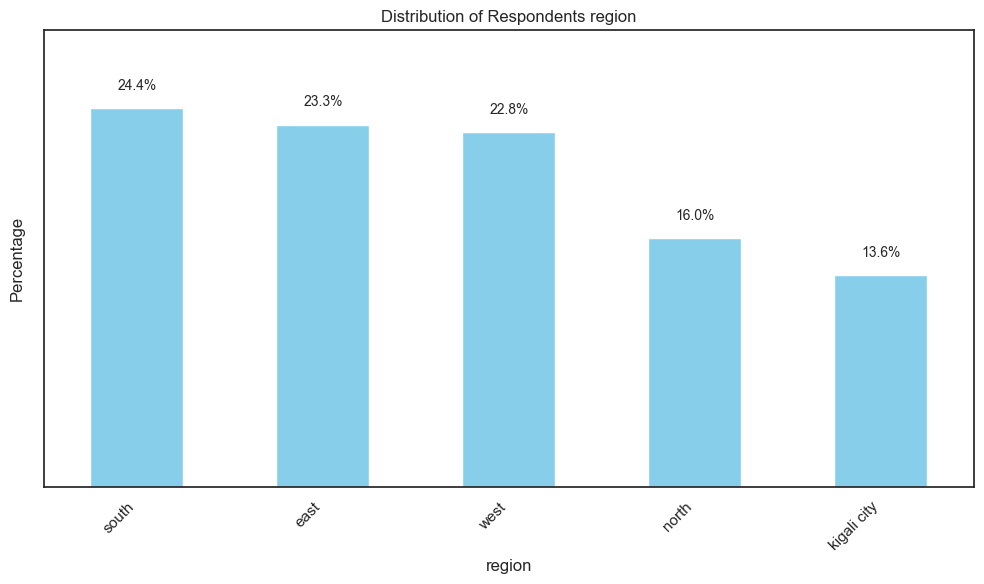


religion Value Counts:
religion
Protestant    56.614646
Catholic      39.793517
Muslim         1.968788
Other          1.623049
Name: proportion, dtype: float64


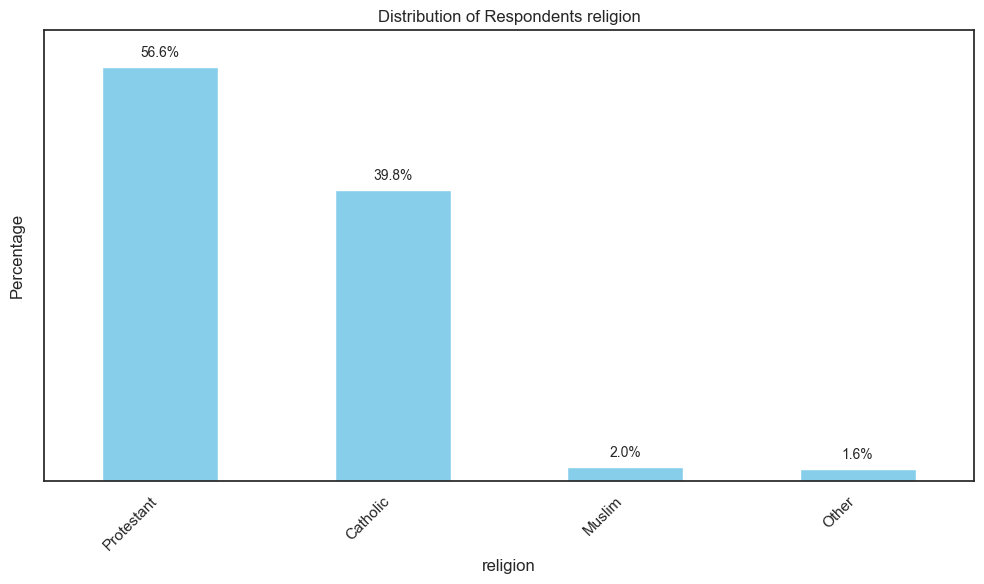


type of place of residence Value Counts:
type of place of residence
rural      77.541417
urban      22.458583
unknown     0.000000
Name: proportion, dtype: float64


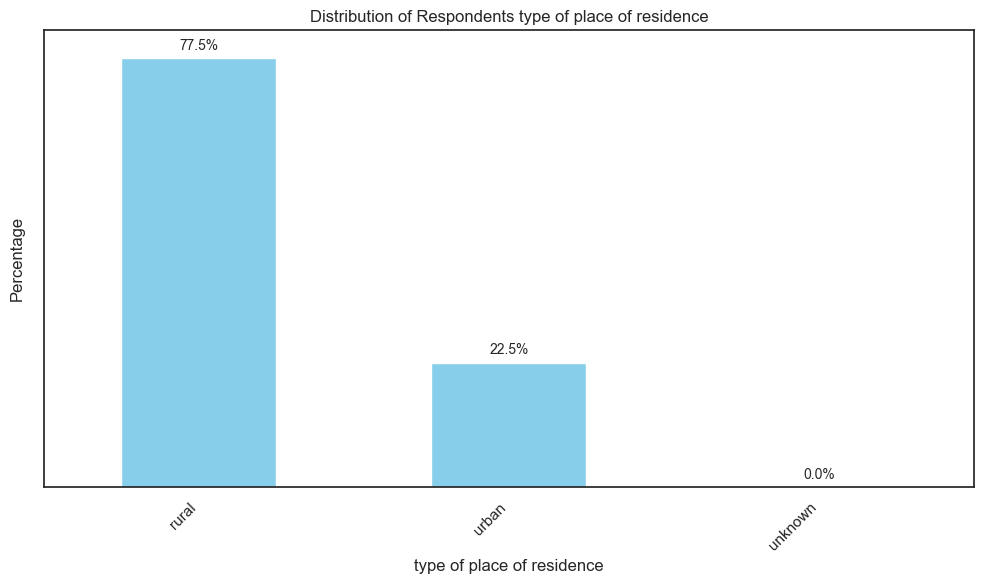


highest educational level Value Counts:
highest educational level
primary         63.126050
secondary       21.723890
no education    11.961585
higher           3.188475
unknown          0.000000
Name: proportion, dtype: float64


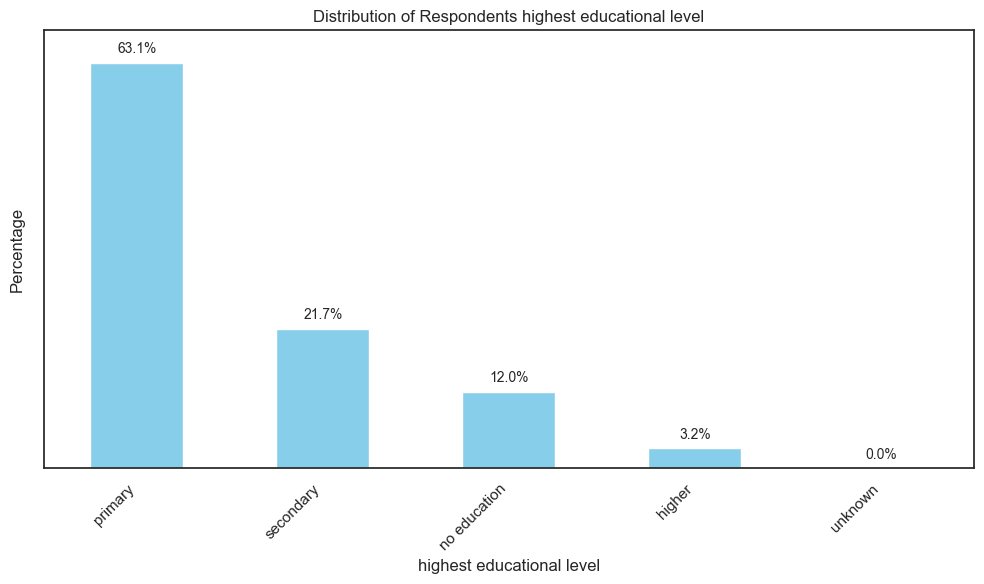


husband/partner's education level Value Counts:
husband/partner's education level
unknown         43.106843
primary         37.776711
no education    10.122449
secondary        6.482593
higher           2.136855
don't know       0.364946
9                0.009604
Name: proportion, dtype: float64


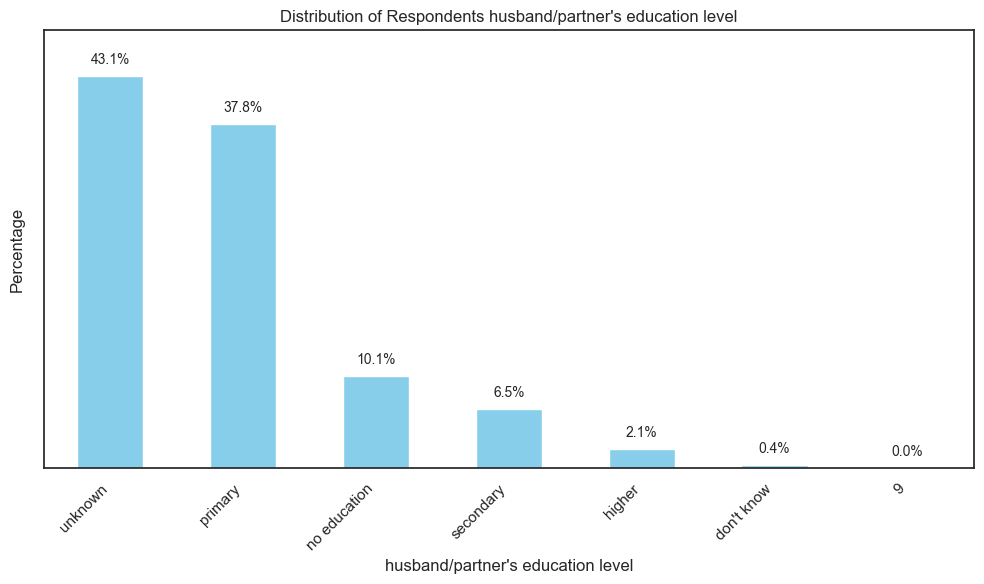


husband/partner's occupation Value Counts:
husband/partner's occupation
Other                         51.121248
Agriculture                   34.218487
Sale/Service                  10.108043
Professional/Tech/Clerical     2.674670
Unemployed                     1.877551
Name: proportion, dtype: float64


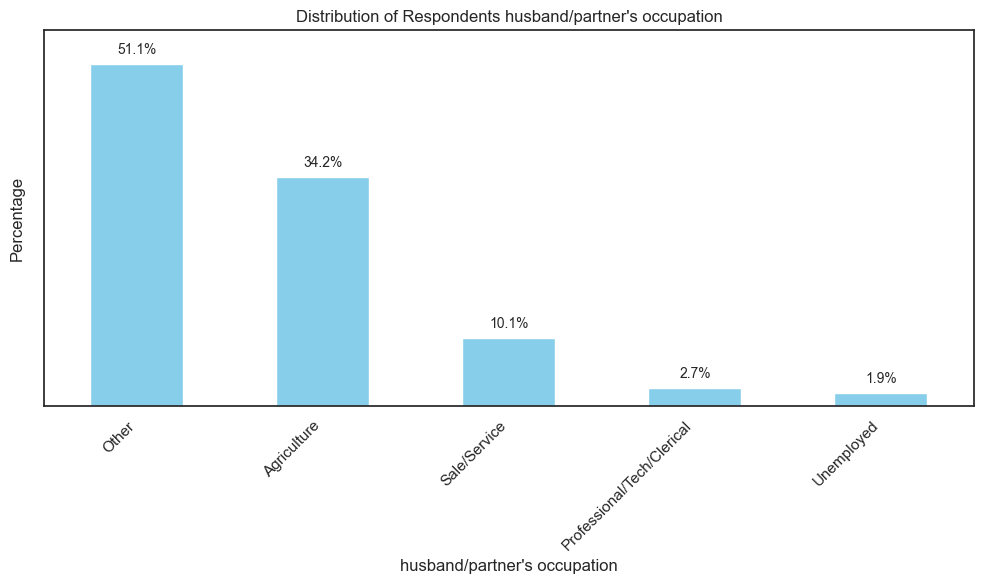


respondent's occupation Value Counts:
respondent's occupation
Agriculture                   58.261705
Unemployed                    19.870348
Sale/Service                  14.679472
Other                          4.605042
Professional/Tech/Clerical     2.583433
Name: proportion, dtype: float64


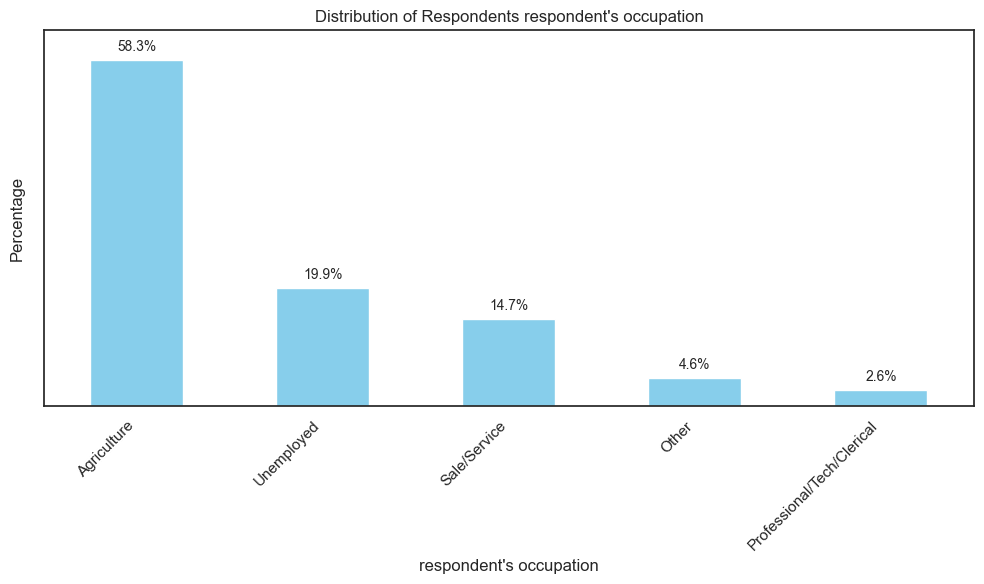


wealth index Value Counts:
wealth index
Rich      43.841537
Poor      37.551020
Middle    18.607443
Name: proportion, dtype: float64


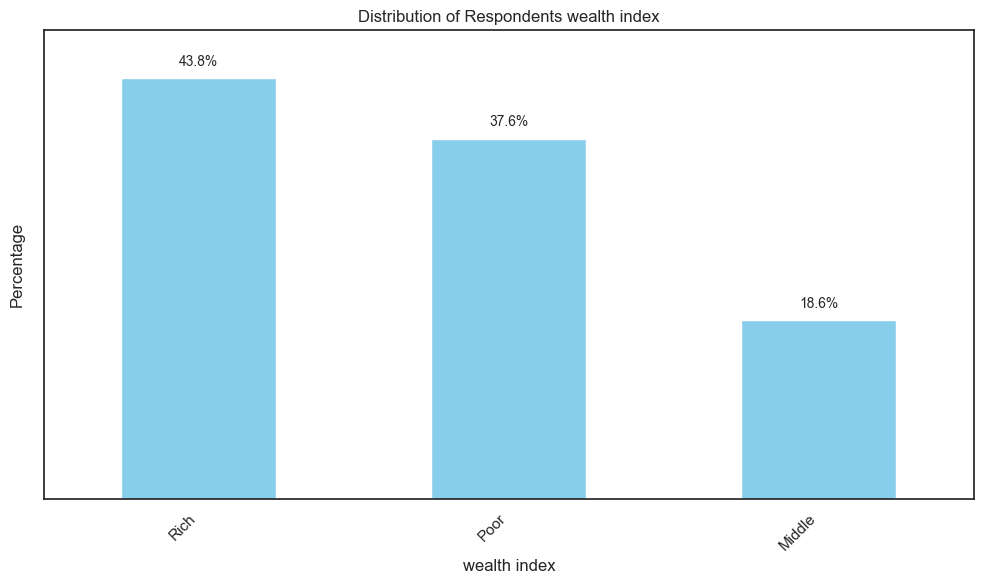


source of drinking water Value Counts:
source of drinking water
Improved      74.809124
Unimproved    25.190876
Name: proportion, dtype: float64


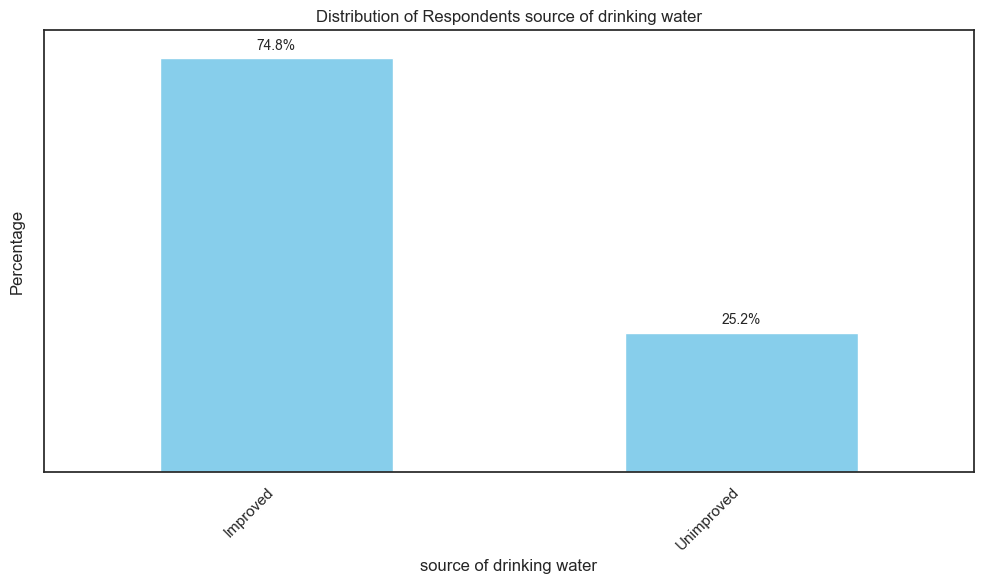


frequency of reading newspaper or magazine Value Counts:
frequency of reading newspaper or magazine
not at all               73.190876
less than once a week    20.302521
at least once a week      6.448980
unknown                   0.038415
9                         0.019208
Name: proportion, dtype: float64


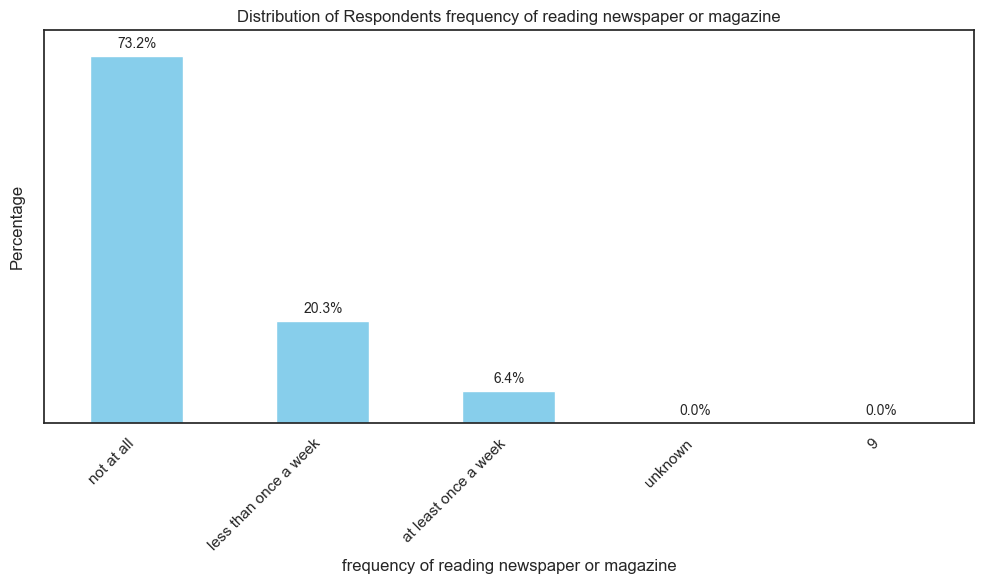


frequency of watching television Value Counts:
frequency of watching television
not at all               58.122449
less than once a week    25.651861
at least once a week     16.139256
unknown                   0.067227
9                         0.019208
Name: proportion, dtype: float64


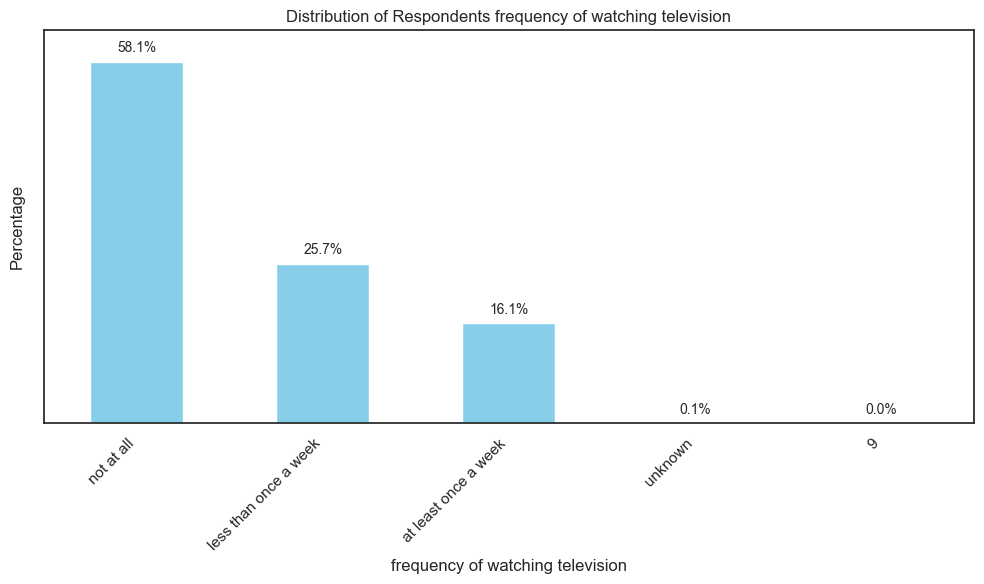


frequency of listening to radio Value Counts:
frequency of listening to radio
at least once a week     64.749100
less than once a week    20.869148
not at all               14.300120
unknown                   0.043217
9                         0.038415
Name: proportion, dtype: float64


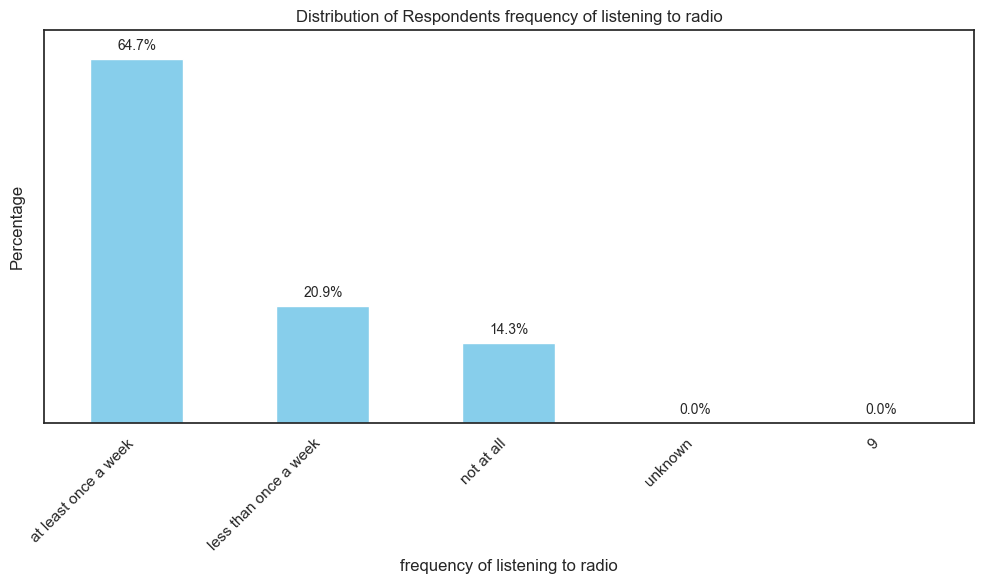


frequency of using internet last month Value Counts:
frequency of using internet last month
unknown                  64.950780
not at all               31.039616
almost every day          2.247299
at least once a week      1.454982
less than once a week     0.307323
Name: proportion, dtype: float64


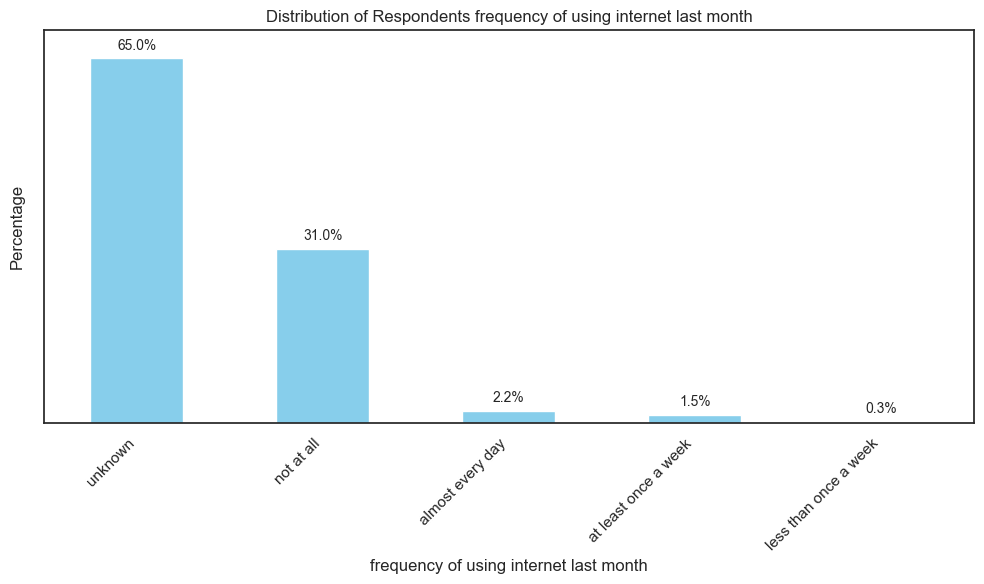


have mosquito bed net for sleeping (from household questionnaire) Value Counts:
have mosquito bed net for sleeping (from household questionnaire)
yes        80.283313
no         19.716687
unknown     0.000000
Name: proportion, dtype: float64


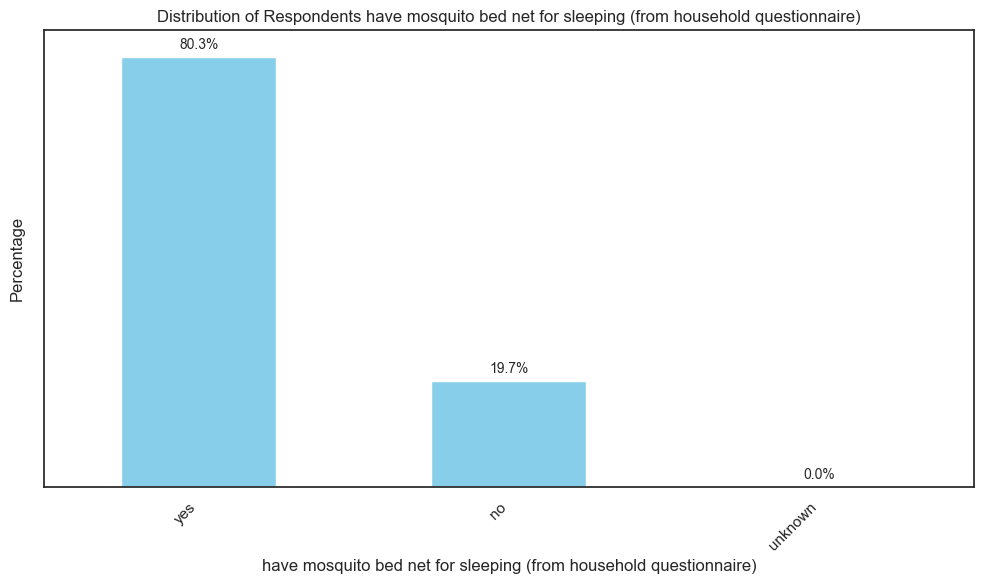


type of toilet facility Value Counts:
type of toilet facility
Improved      73.541417
Unimproved    26.415366
NaN            0.043217
Name: proportion, dtype: float64


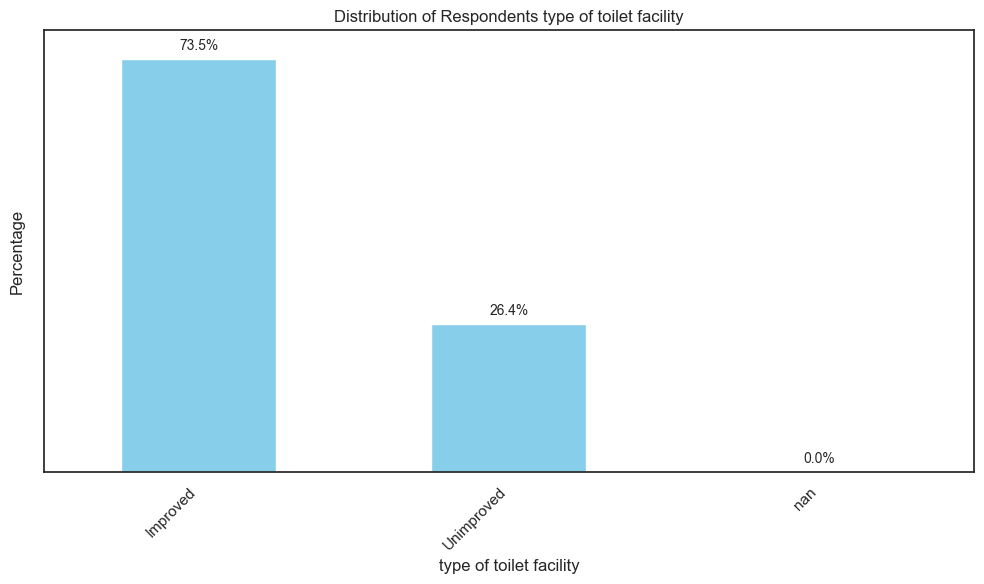


toilet facilities shared with other households Value Counts:
toilet facilities shared with other households
No     82.429772
Yes    17.570228
Name: proportion, dtype: float64


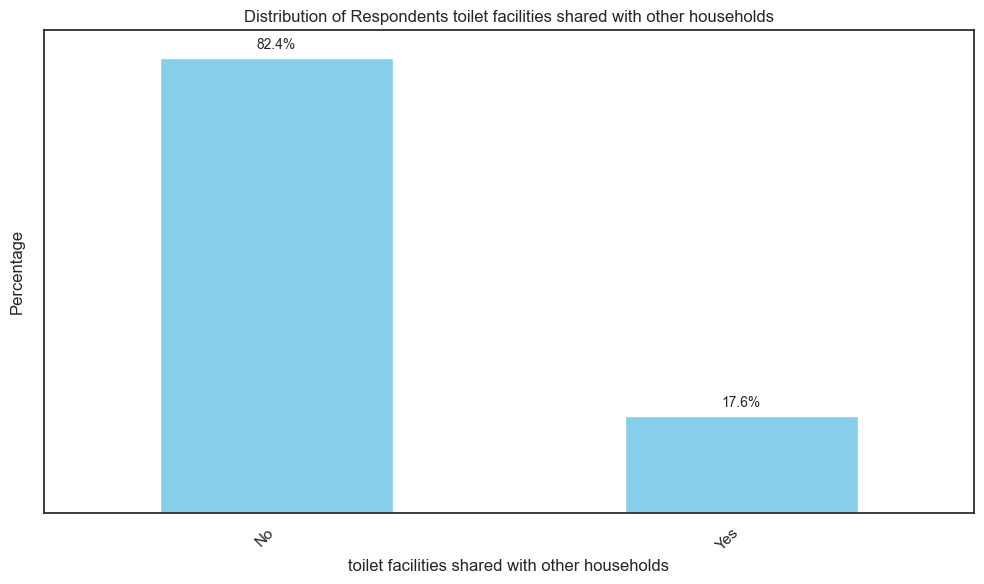


current marital status Value Counts:
current marital status
Married           50.117647
Never in union    39.971188
Not in union       9.911164
Name: proportion, dtype: float64


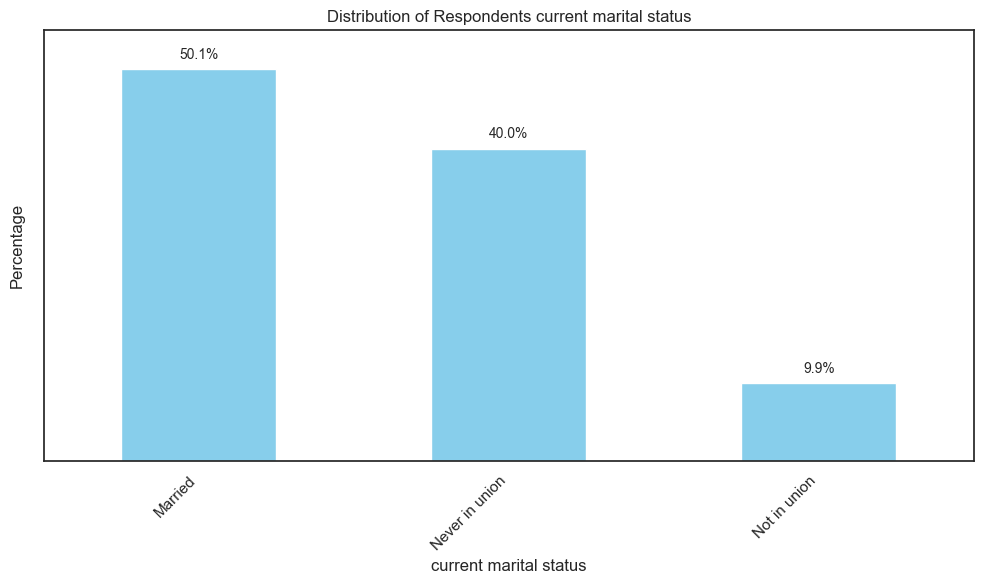


currently pregnant Value Counts:
currently pregnant
no or unsure    93.440576
yes              6.559424
unknown          0.000000
Name: proportion, dtype: float64


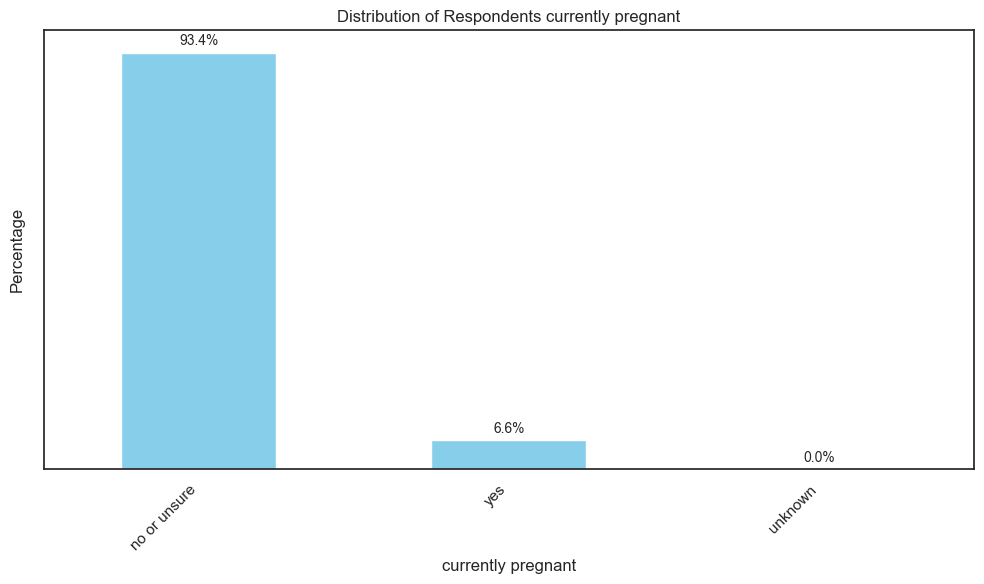


ever had a terminated pregnancy Value Counts:
ever had a terminated pregnancy
no         60.201681
unknown    31.582233
yes         8.211285
9           0.004802
Name: proportion, dtype: float64


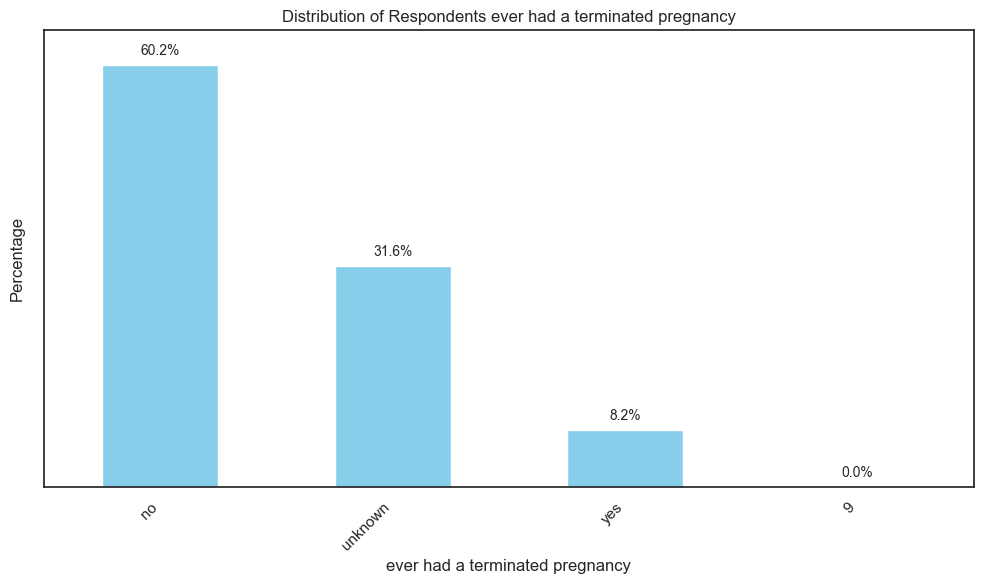


had diarrhea recently Value Counts:
had diarrhea recently
No     93.440576
Yes     6.559424
Name: proportion, dtype: float64


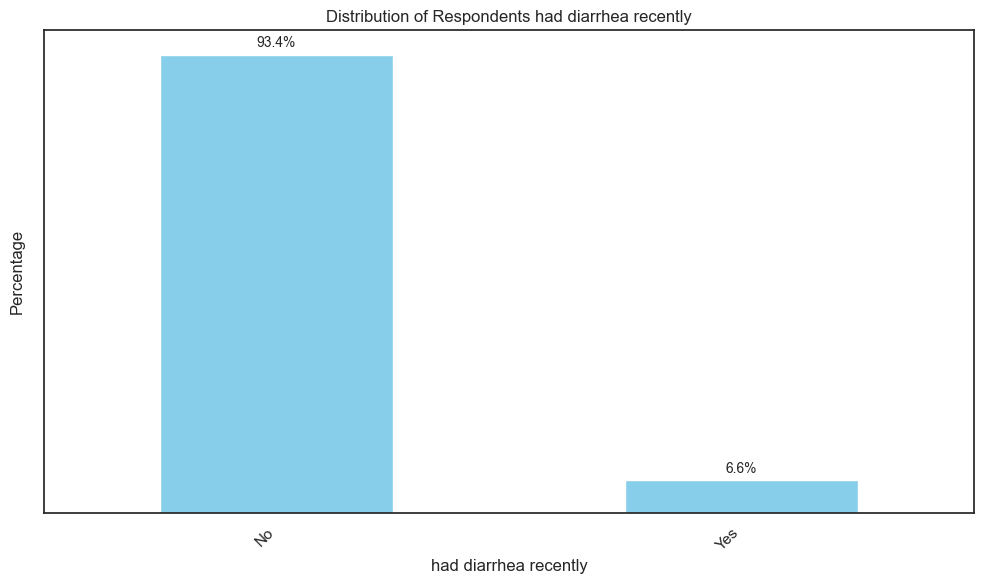


smokes cigarettes Value Counts:
smokes cigarettes
no         99.466987
yes         0.528211
unknown     0.004802
9           0.000000
Name: proportion, dtype: float64


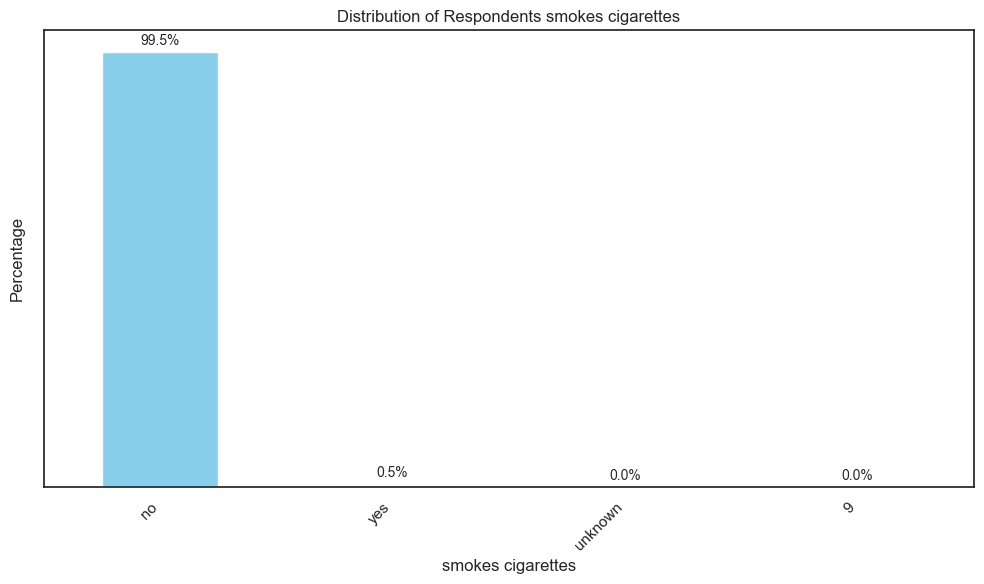


during pregnancy, given or bought iron tablets/syrup Value Counts:
during pregnancy, given or bought iron tablets/syrup
No     65.733493
Yes    34.266507
Name: proportion, dtype: float64


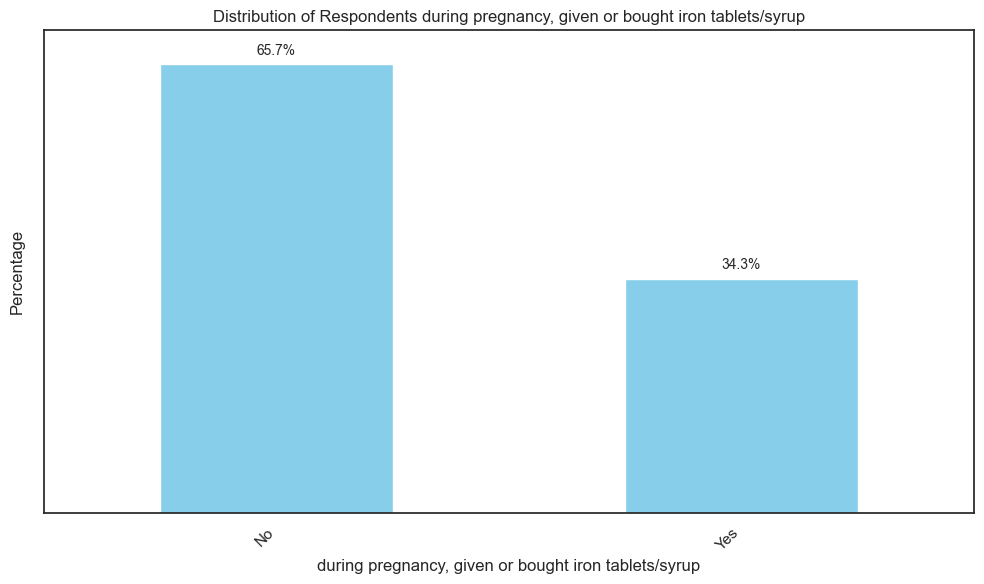


delivery by caesarean section Value Counts:
delivery by caesarean section
unknown    55.903962
no         38.496999
yes         5.594238
9           0.004802
Name: proportion, dtype: float64


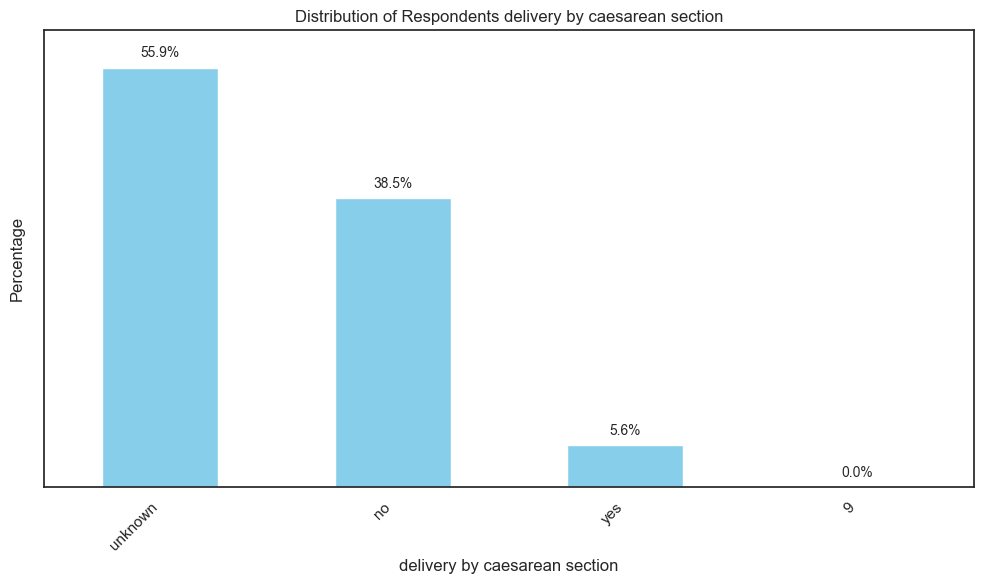


place of delivery Value Counts:
place of delivery
Other            56.686675
Health center    26.007203
Hospital         11.635054
Home delivery     5.671068
Name: proportion, dtype: float64


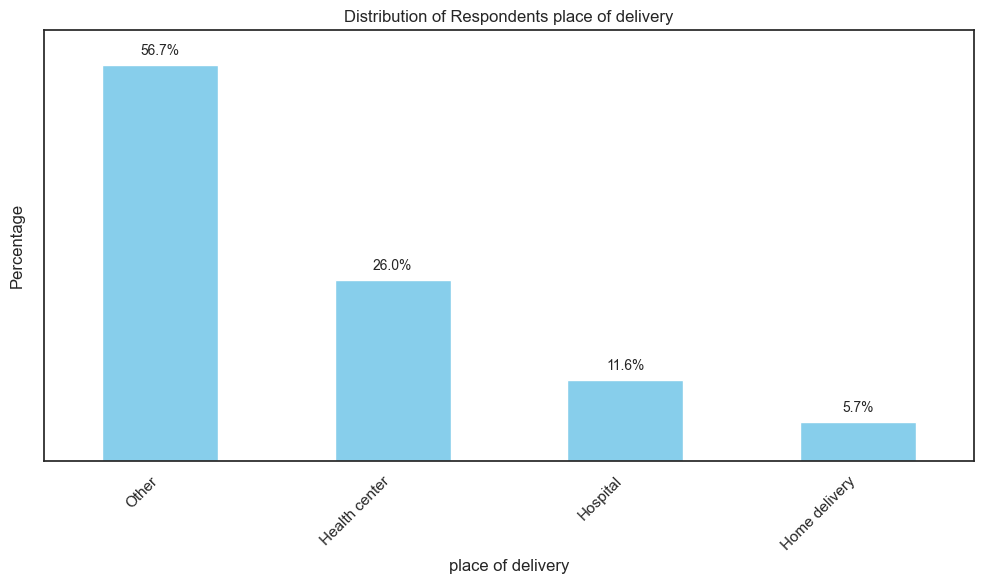


respondent's current age Value Counts:
respondent's current age
15–19    21.949580
35–44    21.344538
20–24    17.891957
25–29    16.504202
30–34    14.439376
45–49     7.870348
Name: proportion, dtype: float64


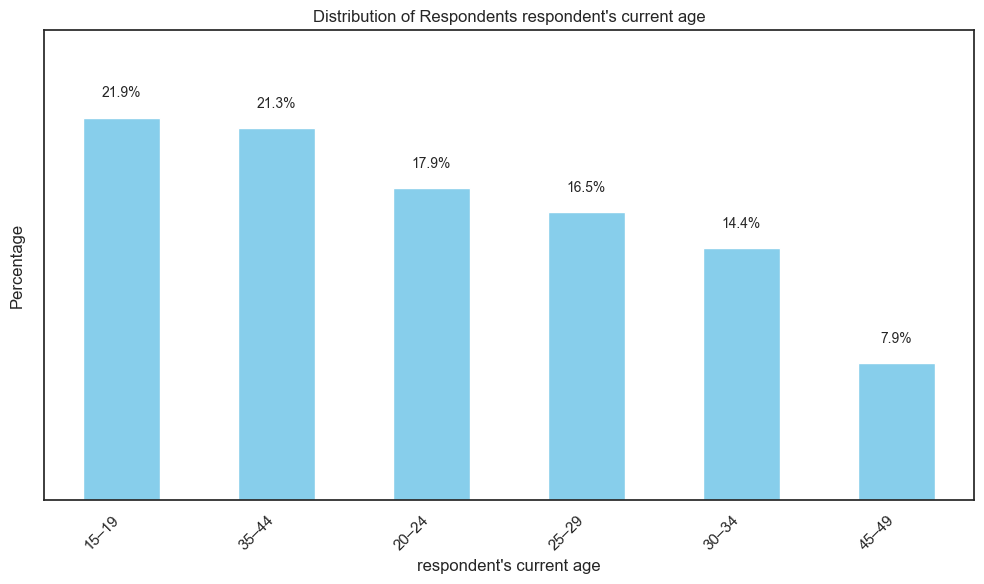


bmi category Value Counts:
bmi category
18.5–24.99    70.871549
≥ 25          22.876351
< 18.5         6.180072
Unknown        0.072029
Name: proportion, dtype: float64


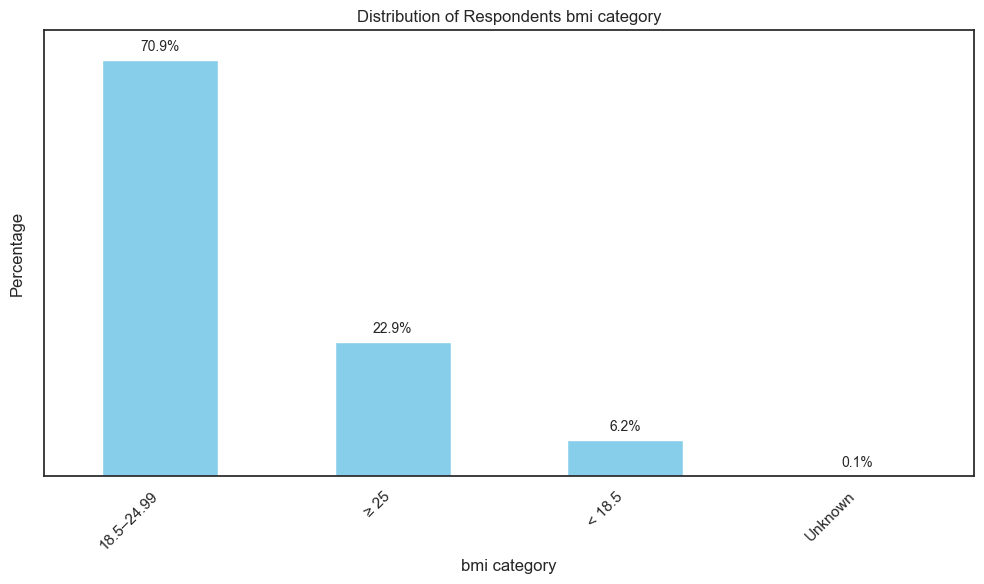


living children + current pregnancy (grouped) Value Counts:
living children + current pregnancy (grouped)
0 - 2    63.783914
3 - 5    28.326531
6+        7.889556
Name: proportion, dtype: float64


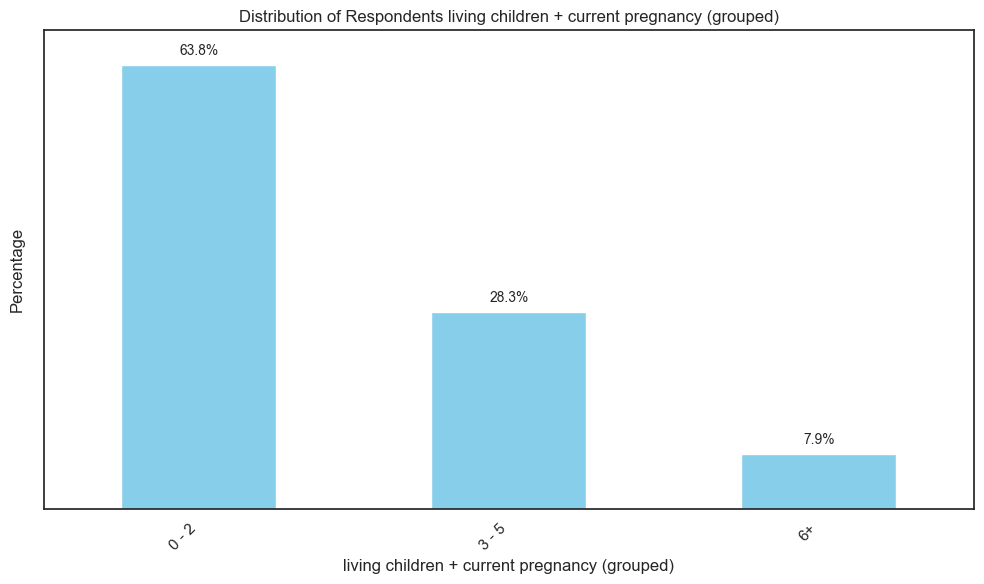


duration of pregnancy Value Counts:
duration of pregnancy
9 months      99.587035
6-8 months     0.355342
>9 months      0.057623
Name: proportion, dtype: float64


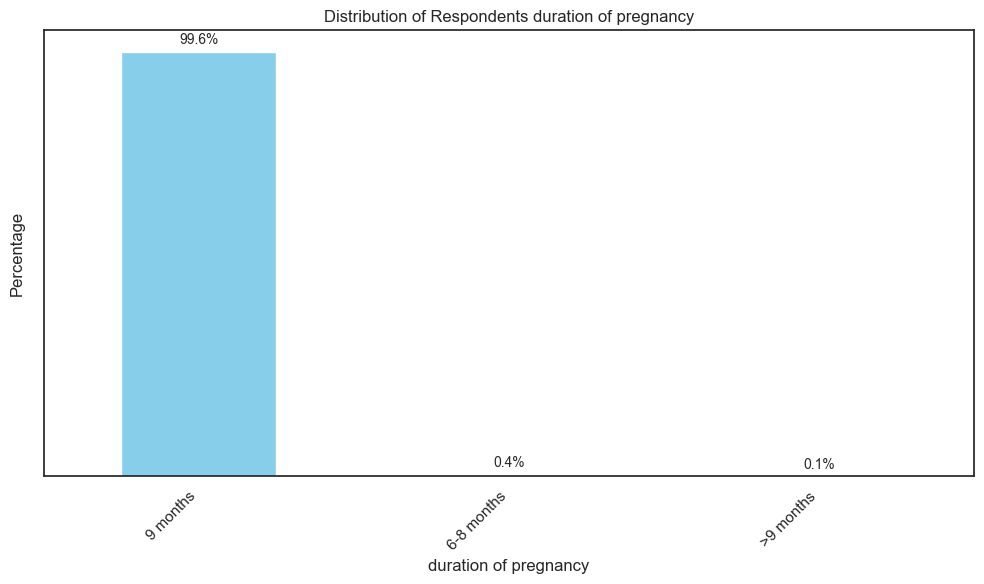

In [ ]:
# -----------------------------
# UNIVARIATE ANALYSIS - CATEGORICAL
# -----------------------------
print("\n--- Univariate Analysis: Categorical Variables ---")
for col in categorical_vars:
    if col in df.columns:
        print(f"\n{col} Value Counts:")
        counts = df[col].value_counts(dropna=False)
        percent = df[col].value_counts(normalize=True, dropna=False) * 100
        edu_counts = percent.sort_values(ascending=False)
        print(percent)

        # Plotting
        ax = edu_counts.plot(kind='bar', color='skyblue')
        ax.set_title(f"Distribution of Respondents {col}")
        ax.set_xlabel(col)
        ax.set_ylabel("Percentage")

        # Add percentage labels
        for i, value in enumerate(edu_counts):
            ax.text(i, value + 1, f"{value:.1f}%", ha='center', va='bottom', fontsize=10)

        # Tidy up
        ax.set_yticklabels([])  # Hide y-axis labels
        ax.tick_params(axis='y', which='both', left=False)
        ax.set_ylim(0, edu_counts.max() + 5)
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()




--- Univariate Analysis: Numerical Variables ---

body mass index Summary:
count    20825.000000
mean        23.017321
std          3.999336
min         12.420000
25%         20.600000
50%         22.460000
75%         24.740000
max         99.990000
Name: body mass index, dtype: float64


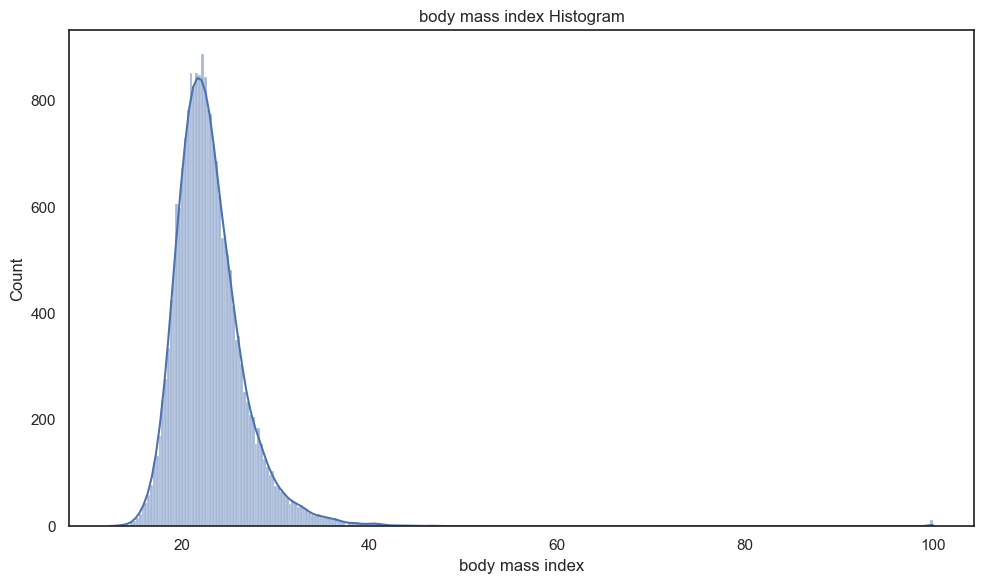

In [ ]:
# -----------------------------
# UNIVARIATE ANALYSIS - NUMERICAL
# -----------------------------
print("\n--- Univariate Analysis: Numerical Variables ---")
for col in numerical_vars:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')
        print(f"\n{col} Summary:")
        print(df[col].describe())
        sns.histplot(df[col].dropna(), kde=True)
        plt.title(f'{col} Histogram')
        plt.tight_layout()
        plt.show()




--- Bivariate Analysis: Categorical vs Target ---

region vs anemia level:
anemia level  Not Anemic  Anemic
region                          
east                3958     890
kigali city         2386     445
north               2908     420
south               4161     911
west                4030     716
Chi-square test p-value: 0.0000


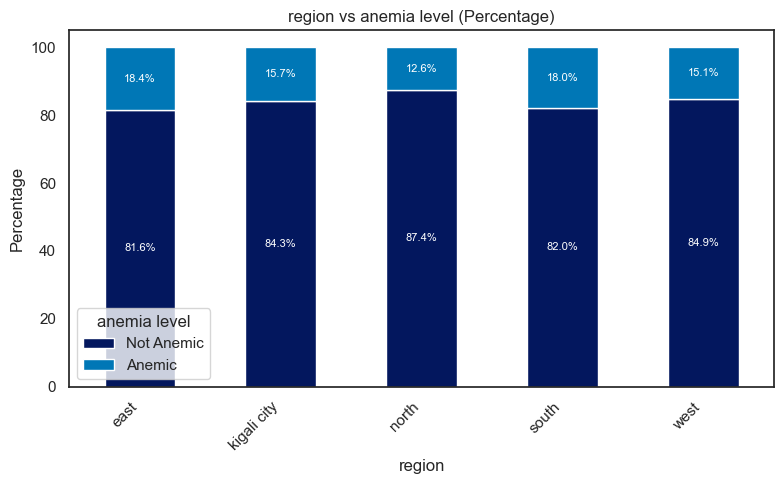


religion vs anemia level:
anemia level  Not Anemic  Anemic
religion                        
Catholic            6950    1337
Muslim               345      65
Other                277      61
Protestant          9871    1919
Chi-square test p-value: 0.8165


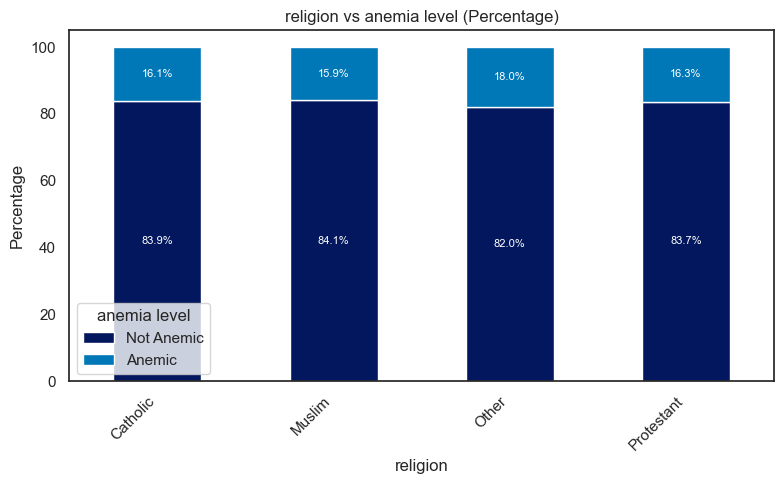


type of place of residence vs anemia level:
anemia level                Not Anemic  Anemic
type of place of residence                    
rural                            13465    2683
urban                             3978     699
Chi-square test p-value: 0.0069


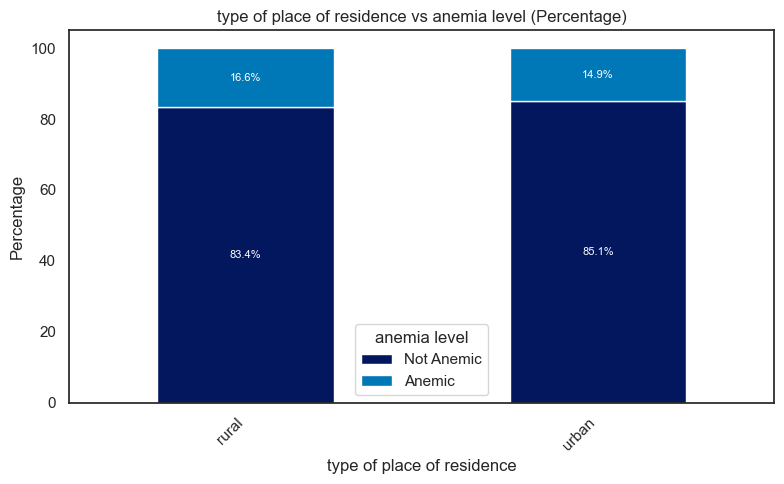


highest educational level vs anemia level:
anemia level               Not Anemic  Anemic
highest educational level                    
higher                            532     132
no education                     2010     481
primary                         11046    2100
secondary                        3855     669
Chi-square test p-value: 0.0000


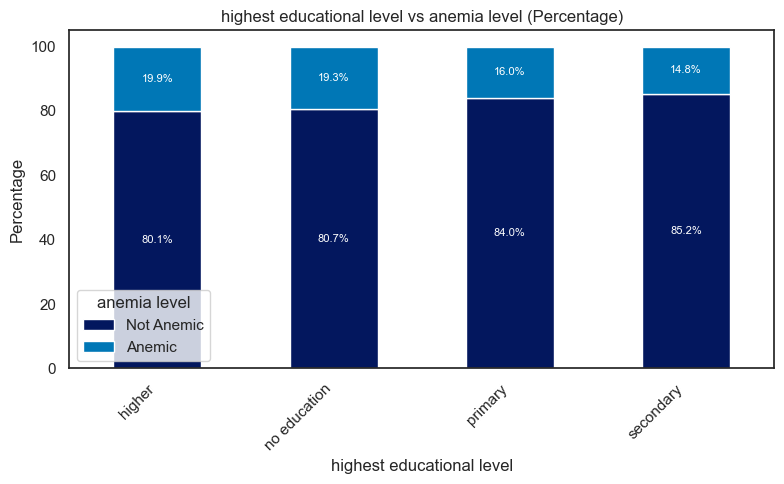


husband/partner's education level vs anemia level:
anemia level                       Not Anemic  Anemic
husband/partner's education level                    
9                                           1       1
don't know                                 64      12
higher                                    368      77
no education                             1697     411
primary                                  6626    1241
secondary                                1131     219
unknown                                  7556    1421
Chi-square test p-value: 0.0019


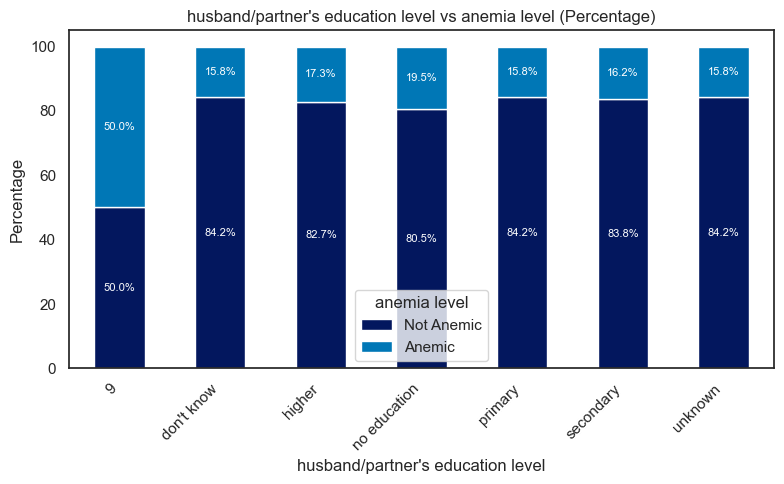


husband/partner's occupation vs anemia level:
anemia level                  Not Anemic  Anemic
husband/partner's occupation                    
Agriculture                         5905    1221
Other                               8975    1671
Professional/Tech/Clerical           463      94
Sale/Service                        1772     333
Unemployed                           328      63
Chi-square test p-value: 0.1385


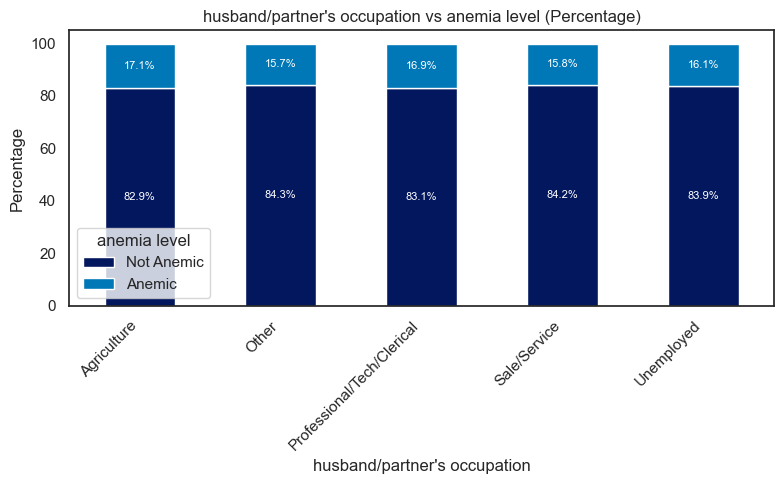


respondent's occupation vs anemia level:
anemia level                Not Anemic  Anemic
respondent's occupation                       
Agriculture                      10115    2018
Other                              810     149
Professional/Tech/Clerical         452      86
Sale/Service                      2598     459
Unemployed                        3468     670
Chi-square test p-value: 0.2744


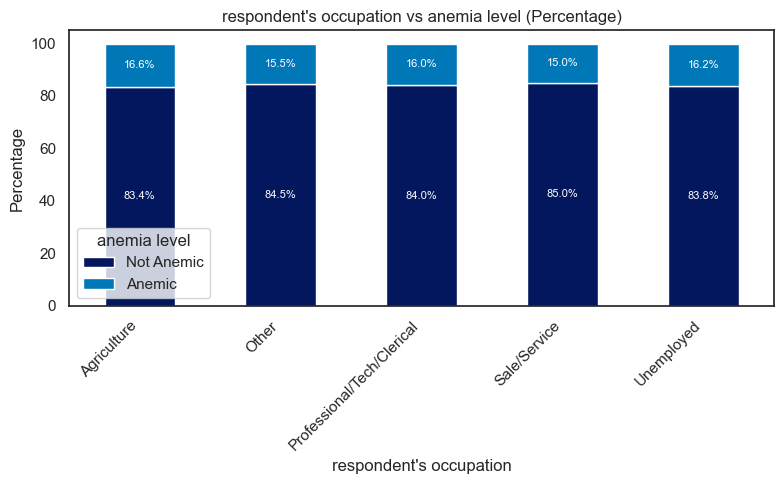


wealth index vs anemia level:
anemia level  Not Anemic  Anemic
wealth index                    
Middle              3274     601
Poor                6390    1430
Rich                7779    1351
Chi-square test p-value: 0.0000


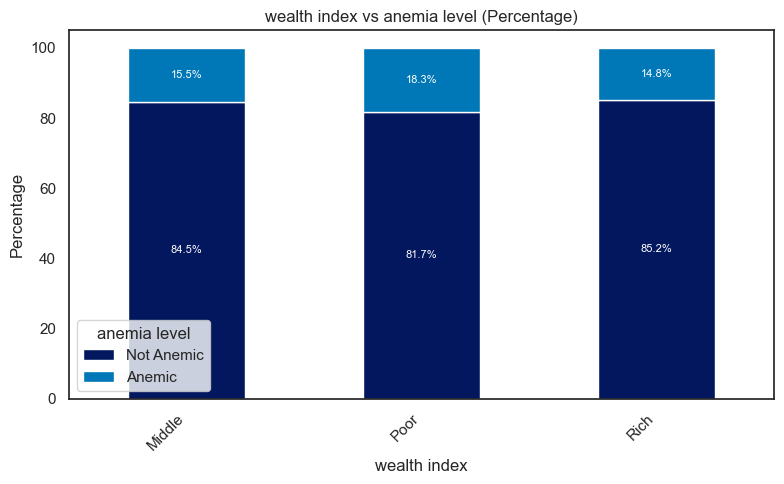


source of drinking water vs anemia level:
anemia level              Not Anemic  Anemic
source of drinking water                    
Improved                       13094    2485
Unimproved                      4349     897
Chi-square test p-value: 0.0539


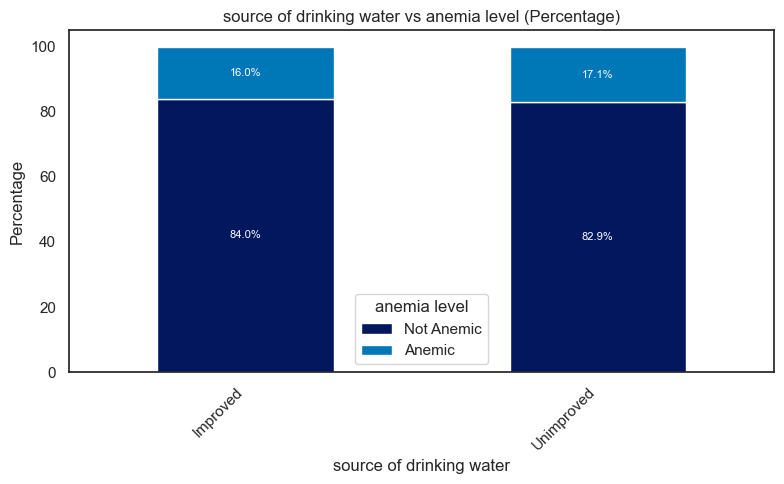


frequency of reading newspaper or magazine vs anemia level:
anemia level                                Not Anemic  Anemic
frequency of reading newspaper or magazine                    
9                                                    4       0
at least once a week                              1130     213
less than once a week                             3540     688
not at all                                       12762    2480
unknown                                              7       1
Chi-square test p-value: 0.9076


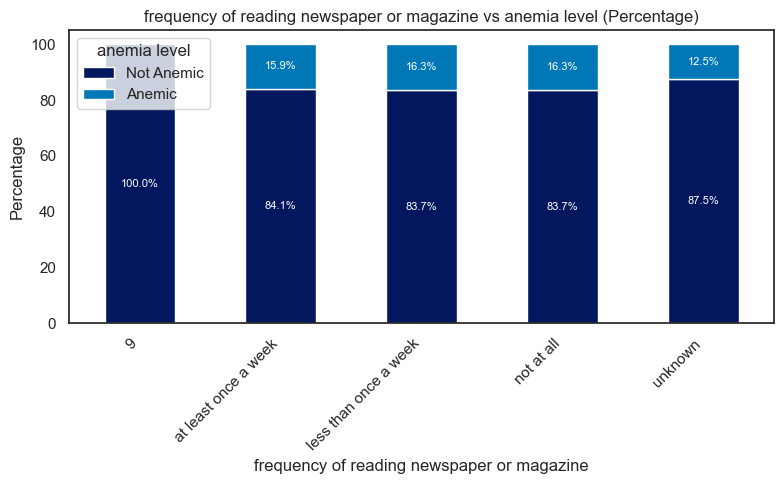


frequency of watching television vs anemia level:
anemia level                      Not Anemic  Anemic
frequency of watching television                    
9                                          3       1
at least once a week                    2852     509
less than once a week                   4502     840
not at all                             10076    2028
unknown                                   10       4
Chi-square test p-value: 0.0859


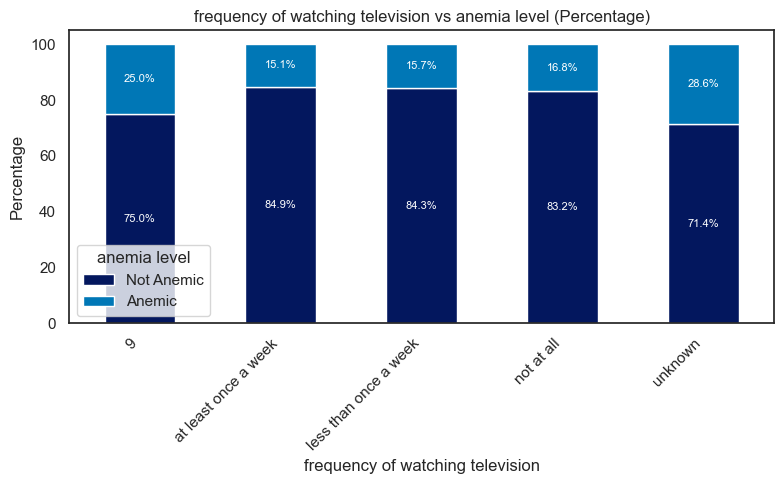


frequency of listening to radio vs anemia level:
anemia level                     Not Anemic  Anemic
frequency of listening to radio                    
9                                         5       3
at least once a week                  11377    2107
less than once a week                  3597     749
not at all                             2456     522
unknown                                   8       1
Chi-square test p-value: 0.0096


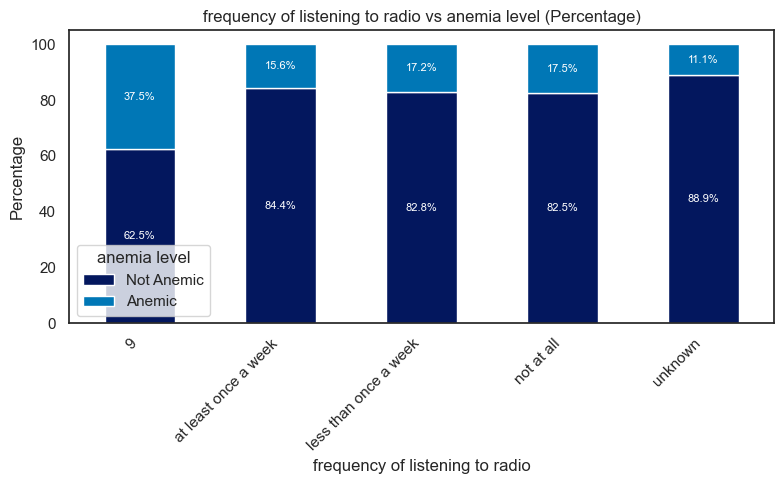


frequency of using internet last month vs anemia level:
anemia level                            Not Anemic  Anemic
frequency of using internet last month                    
almost every day                               399      69
at least once a week                           268      35
less than once a week                           56       8
not at all                                    5625     839
unknown                                      11095    2431
Chi-square test p-value: 0.0000


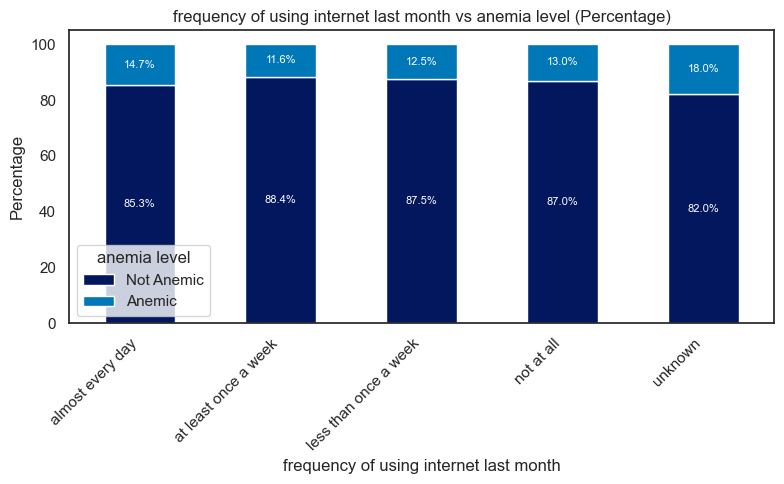


have mosquito bed net for sleeping (from household questionnaire) vs anemia level:
anemia level                                        Not Anemic  Anemic
have mosquito bed net for sleeping (from househ...                    
no                                                        3428     678
yes                                                      14015    2704
Chi-square test p-value: 0.6140


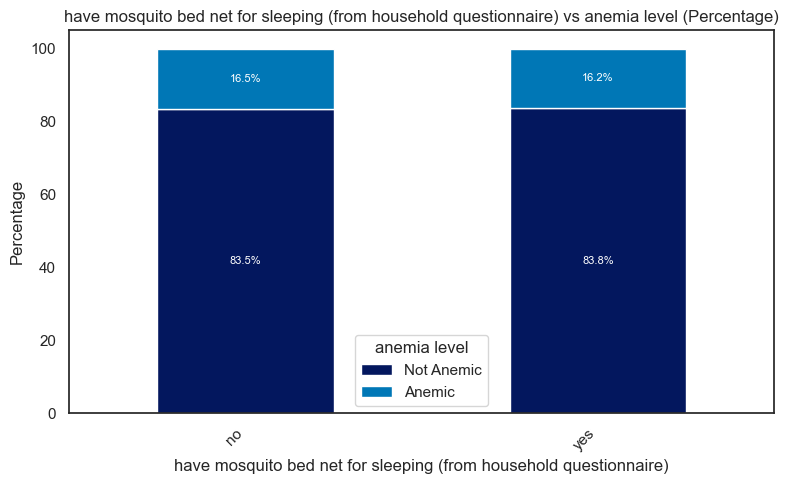


type of toilet facility vs anemia level:
anemia level             Not Anemic  Anemic
type of toilet facility                    
Improved                      12874    2441
Unimproved                     4561     940
Chi-square test p-value: 0.0499


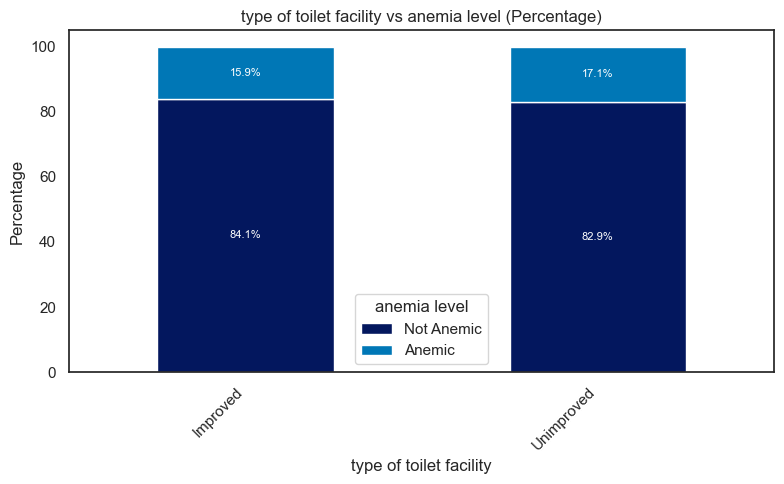


toilet facilities shared with other households vs anemia level:
anemia level                                    Not Anemic  Anemic
toilet facilities shared with other households                    
No                                                   14388    2778
Yes                                                   3055     604
Chi-square test p-value: 0.6470


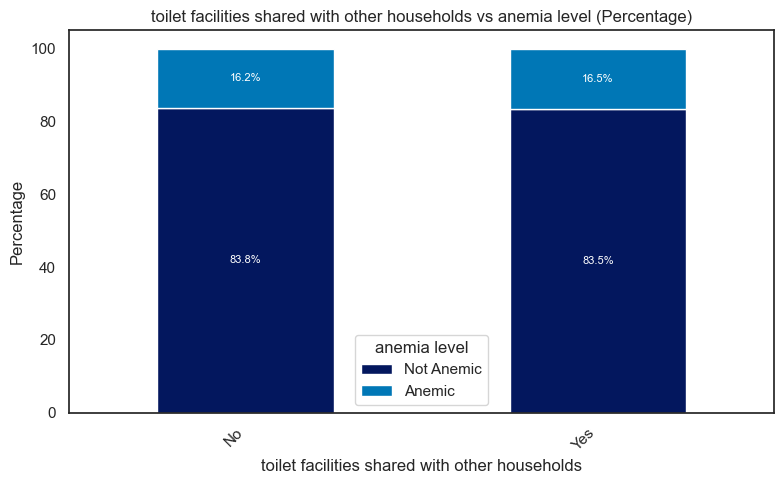


current marital status vs anemia level:
anemia level            Not Anemic  Anemic
current marital status                    
Married                       8810    1627
Never in union                7010    1314
Not in union                  1623     441
Chi-square test p-value: 0.0000


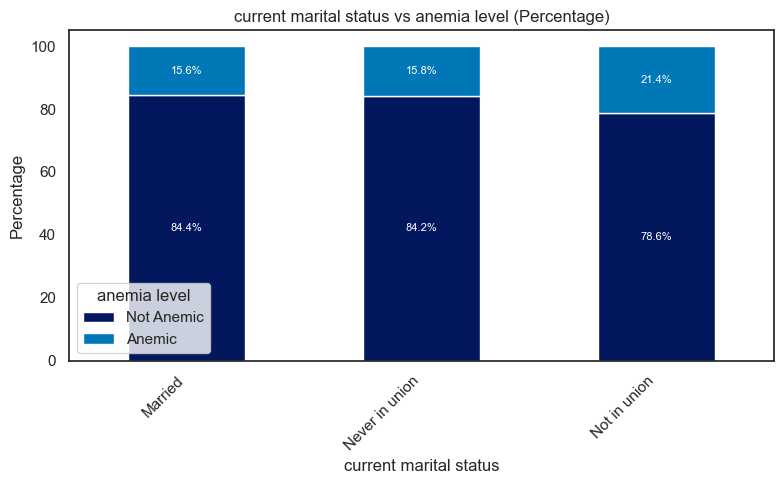


currently pregnant vs anemia level:
anemia level        Not Anemic  Anemic
currently pregnant                    
no or unsure             16374    3085
yes                       1069     297
Chi-square test p-value: 0.0000


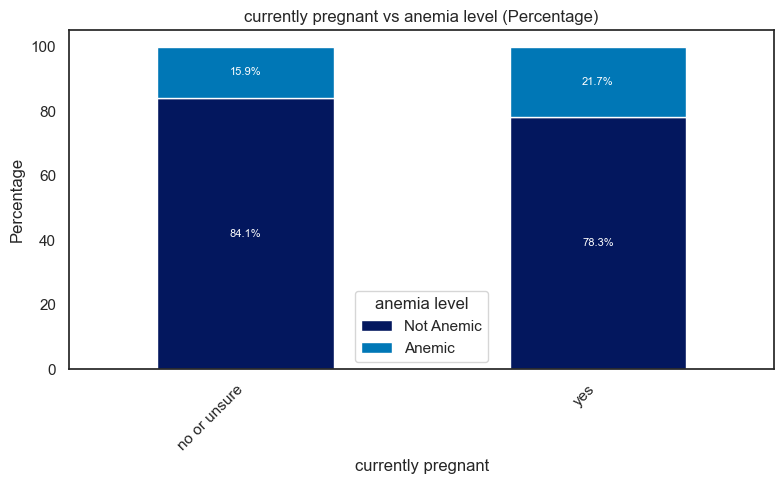


ever had a terminated pregnancy vs anemia level:
anemia level                     Not Anemic  Anemic
ever had a terminated pregnancy                    
9                                         1       0
no                                    10692    1845
yes                                    1430     280
unknown                                5320    1257
Chi-square test p-value: 0.0000


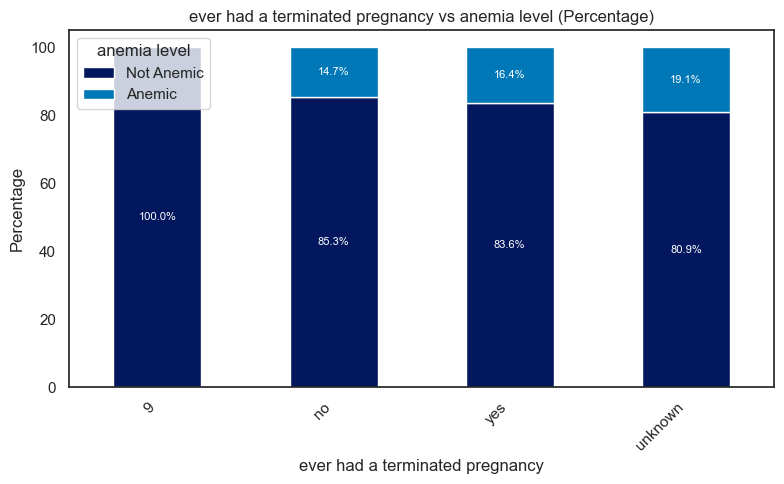


had diarrhea recently vs anemia level:
anemia level           Not Anemic  Anemic
had diarrhea recently                    
No                          16295    3164
Yes                          1148     218
Chi-square test p-value: 0.7999


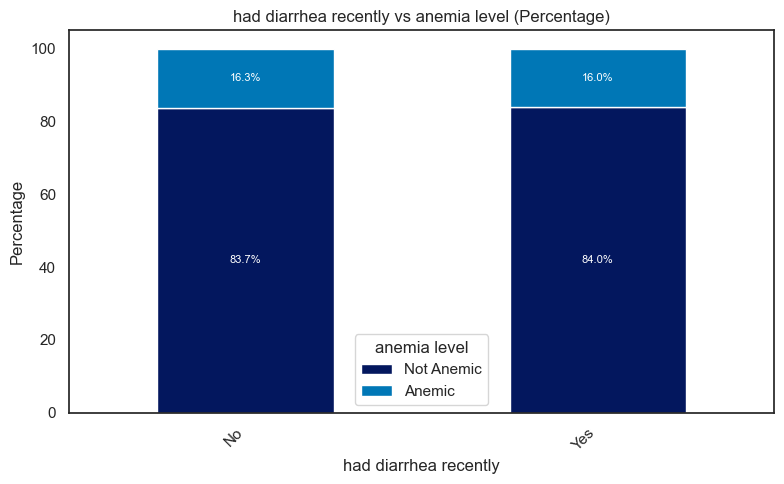


smokes cigarettes vs anemia level:
anemia level       Not Anemic  Anemic
smokes cigarettes                    
no                      17350    3364
yes                        92      18
unknown                     1       0
Chi-square test p-value: 0.9070


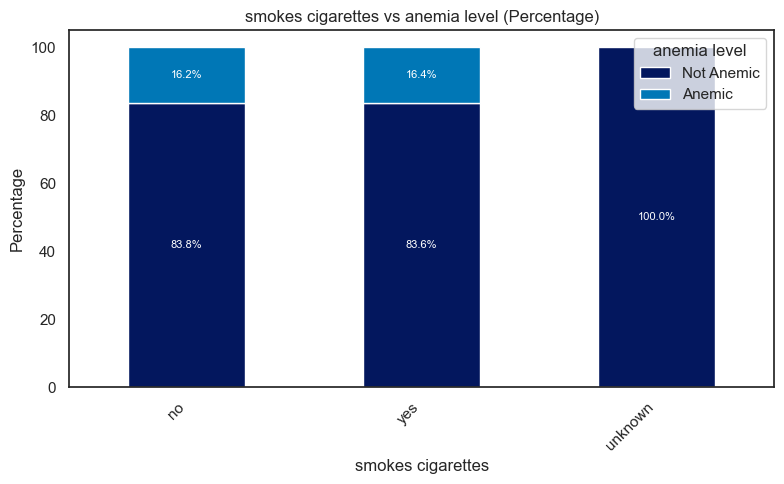


during pregnancy, given or bought iron tablets/syrup vs anemia level:
anemia level                                        Not Anemic  Anemic
during pregnancy, given or bought iron tablets/...                    
No                                                       11445    2244
Yes                                                       5998    1138
Chi-square test p-value: 0.4195


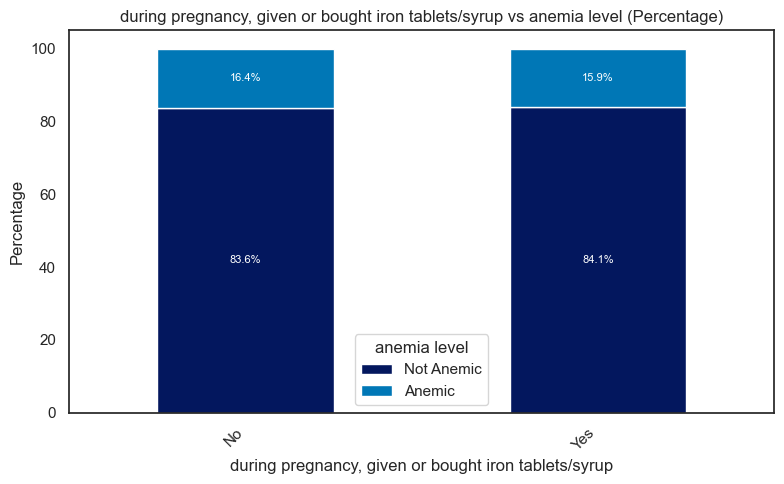


delivery by caesarean section vs anemia level:
anemia level                   Not Anemic  Anemic
delivery by caesarean section                    
9                                       1       0
no                                   6715    1302
yes                                  1000     165
unknown                              9727    1915
Chi-square test p-value: 0.2345


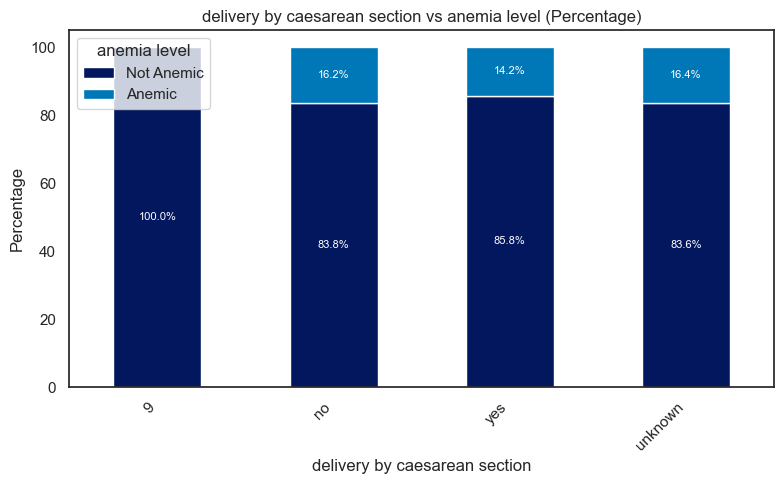


place of delivery vs anemia level:
anemia level       Not Anemic  Anemic
place of delivery                    
Health center            4566     850
Home delivery             964     217
Hospital                 2052     371
Other                    9861    1944
Chi-square test p-value: 0.0680


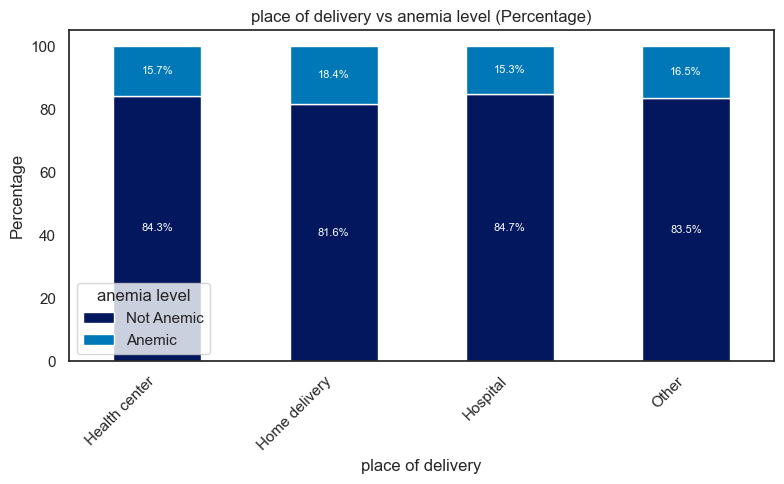


respondent's current age vs anemia level:
anemia level              Not Anemic  Anemic
respondent's current age                    
15–19                           3856     715
20–24                           3130     596
25–29                           2908     529
30–34                           2560     447
35–44                           3684     761
45–49                           1305     334
Chi-square test p-value: 0.0000


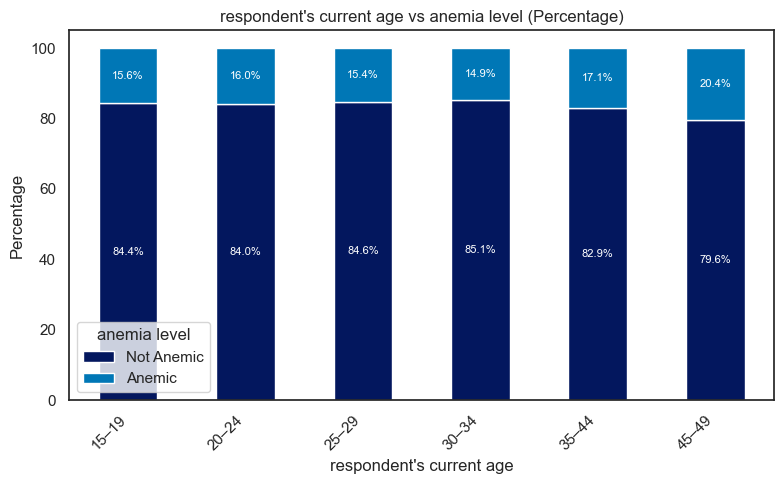


bmi category vs anemia level:
anemia level  Not Anemic  Anemic
bmi category                    
18.5–24.99         12319    2440
< 18.5              1015     272
Unknown               13       2
≥ 25                4096     668
Chi-square test p-value: 0.0000


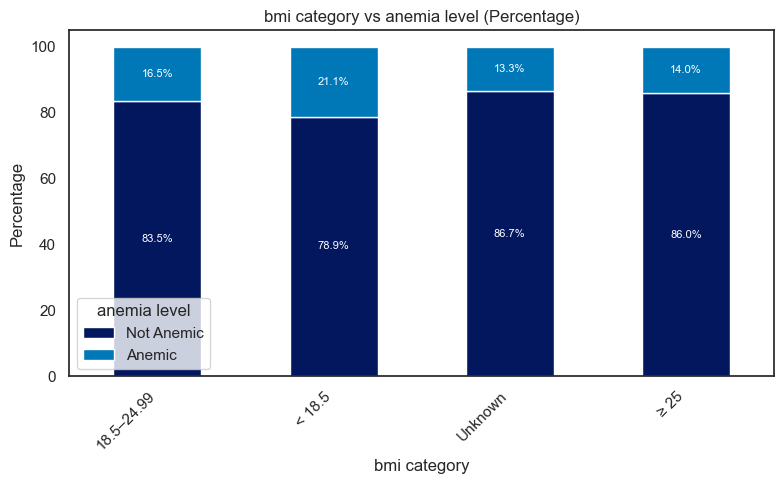


living children + current pregnancy (grouped) vs anemia level:
anemia level                                   Not Anemic  Anemic
living children + current pregnancy (grouped)                    
0 - 2                                               11194    2089
3 - 5                                                4911     988
6+                                                   1338     305
Chi-square test p-value: 0.0061


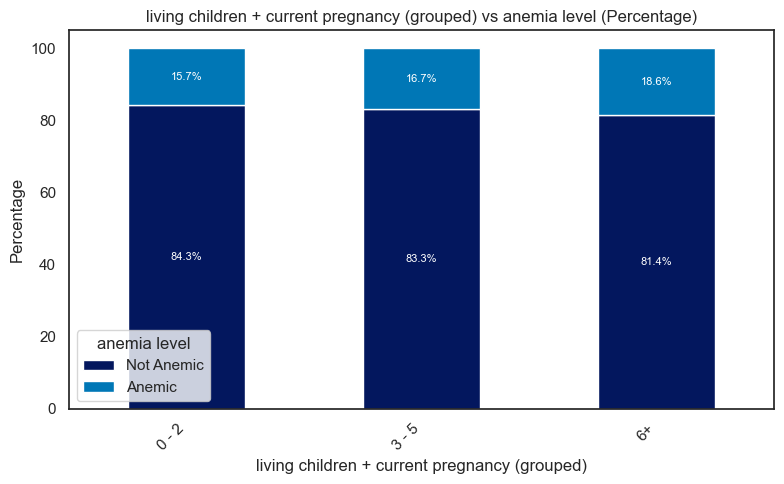


duration of pregnancy vs anemia level:
anemia level           Not Anemic  Anemic
duration of pregnancy                    
6-8 months                     59      15
9 months                    17373    3366
>9 months                      11       1
Chi-square test p-value: 0.4876


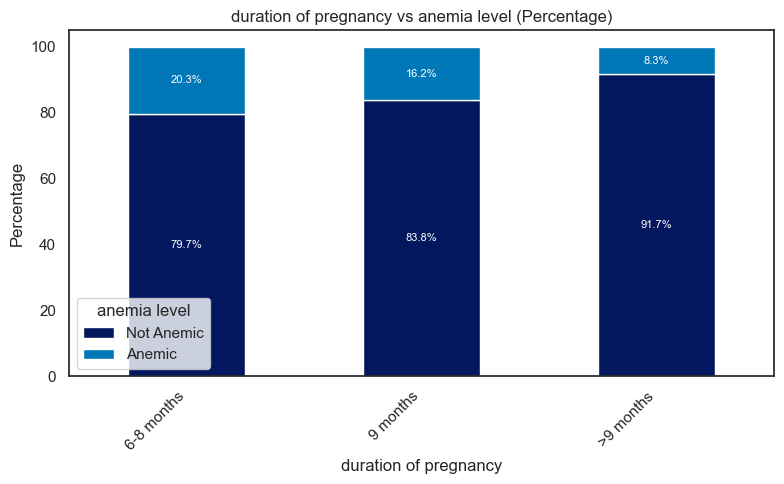

In [ ]:
# -----------------------------
# BIVARIATE ANALYSIS - CATEGORICAL vs TARGET
# -----------------------------

custom_colors = ["#03175e", '#0077b6', '#00b4d8', '#90e0ef']
print("\n--- Bivariate Analysis: Categorical vs Target ---")
for col in categorical_vars:
    if col in df.columns:
        print(f"\n{col} vs {target}:")
        crosstab = pd.crosstab(df[col], df[target])
        print(crosstab)

        try:
            chi2, p, _, _ = chi2_contingency(crosstab)
            print(f"Chi-square test p-value: {p:.4f}")
        except:
            print("Chi-square test failed.")

        # Normalize to percentages
        crosstab_norm = crosstab.div(crosstab.sum(axis=1), axis=0) * 100

        # Plot
        ax = crosstab_norm.plot(kind='bar', stacked=True, color=custom_colors, figsize=(8, 5))
        ax.set_title(f"{col} vs {target} (Percentage)")
        ax.set_ylabel("Percentage")
        plt.xticks(rotation=45, ha='right')

        # Add percentage labels
        for i, (index, row) in enumerate(crosstab_norm.iterrows()):
            cumulative = 0
            for j, val in enumerate(row):
                if val > 0:
                    ax.text(i, cumulative + val / 2, f"{val:.1f}%", ha='center', va='center', fontsize=8, color='white')
                    cumulative += val

        plt.tight_layout()
        plt.show()

